## Equatorial plots

In [1]:
%%capture 
# comment above line to see details about the run(s) displayed
from misc import *
import intake, yaml
%matplotlib inline

In [2]:
# load obs
catalog = intake.open_catalog('/glade/u/home/gmarques/libs/oce-catalogs/reference-datasets.yml')
obs = catalog['woa-2018-tx2_3v2-annual-all'].to_dask()
obs['xh'] = grd[0].xh
obs['yh'] = grd[0].yh
thetao_obs = obs.thetao
salt_obs = obs.so
obs_label = catalog['woa-2018-tx2_3v2-annual-all'].metadata['prefix']+' '+str(catalog['woa-2018-tx2_3v2-annual-all'].metadata['version'])

In [3]:
def plot_comparison(model, var, obs, vmin, vmax, diff, cname):
  fig, ax = plt.subplots(nrows=3, ncols=1,
                       sharex=True,sharey=True,
                       figsize=(12,14))

  ax1 = ax.flatten()

  model[var].plot(ax=ax1[0], ylim=(500,0),
                     y="z_l",vmin=vmin, vmax=vmax,
                     yincrease=False);

  obs.sel(yh=0., 
               method="nearest").plot(ax=ax1[1], ylim=(500, 0),
                                      y="z_l",vmin=vmin, vmax=vmax,
                                      yincrease=False);

  (model[var] - obs.sel(yh=0., 
               method="nearest")).plot(ax=ax1[2], ylim=(500, 0),
                                      y="z_l", cmap="bwr", vmin=-diff, vmax=diff, 
                                      yincrease=False);

  ax[0].set_title('Model, casename = {}'.format(cname)); ax[0].set_xlabel('')
  ax[1].set_title('Obs (WOA18)'); ax[1].set_xlabel('')
  ax[2].set_title('Model - Obs'); ax[2].set_xlabel('Longitude');
  return

#### Potential temperature

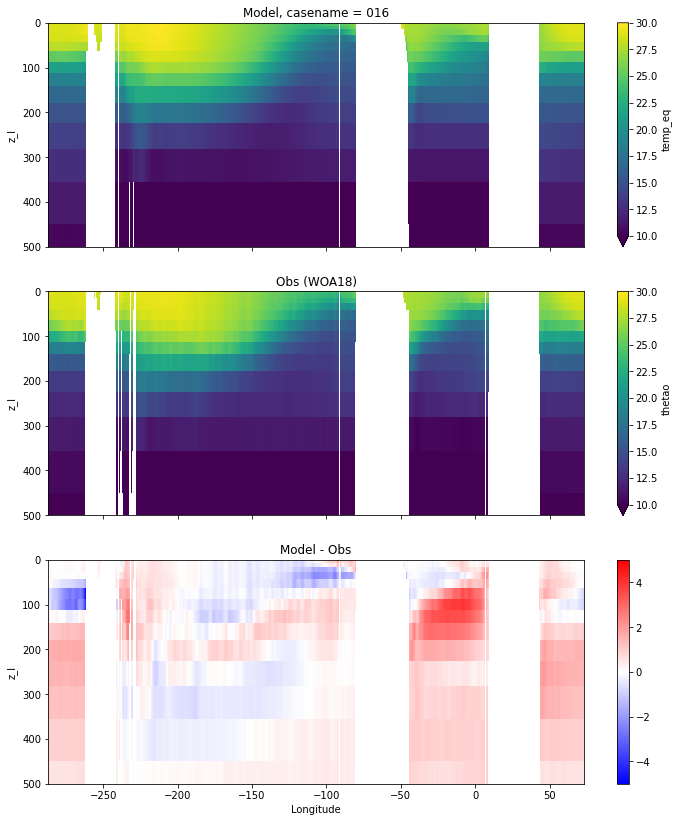

In [4]:
for path, case, i in zip(ocn_path, casename, range(len(casename))):
  ds_temp = xr.open_dataset(ocn_path[i]+casename[i]+'_temp_eq.nc').rename({'zl':'z_l'})
  plot_comparison(ds_temp,'temp_eq',thetao_obs,10,30,5,label[i])

### Salinity

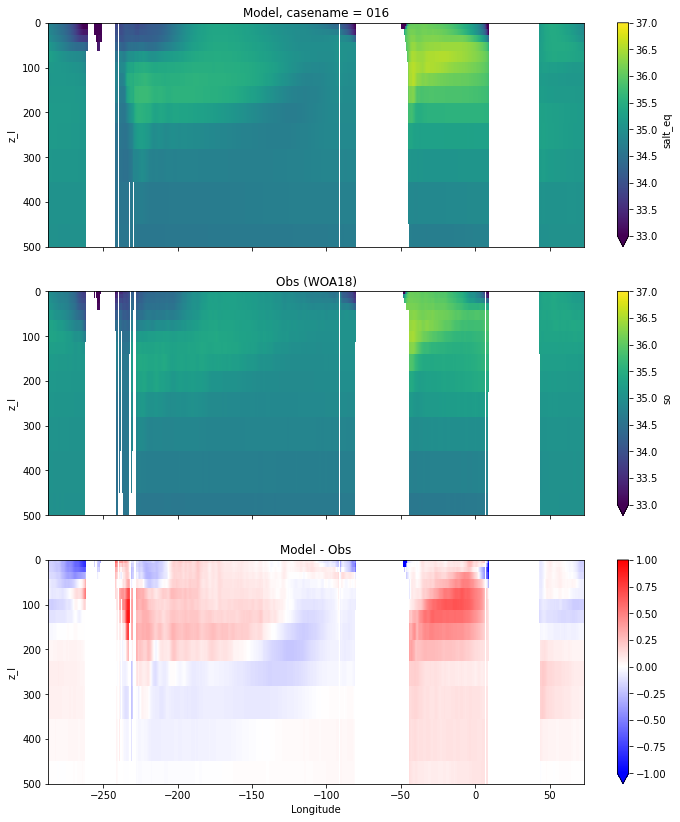

In [5]:
for path, case, i in zip(ocn_path, casename, range(len(casename))):
  ds_salt = xr.open_dataset(ocn_path[i]+casename[i]+'_salt_eq.nc').rename({'zl':'z_l'})
  plot_comparison(ds_salt,'salt_eq',salt_obs,33,37,1,label[i])

### Miscellaneous

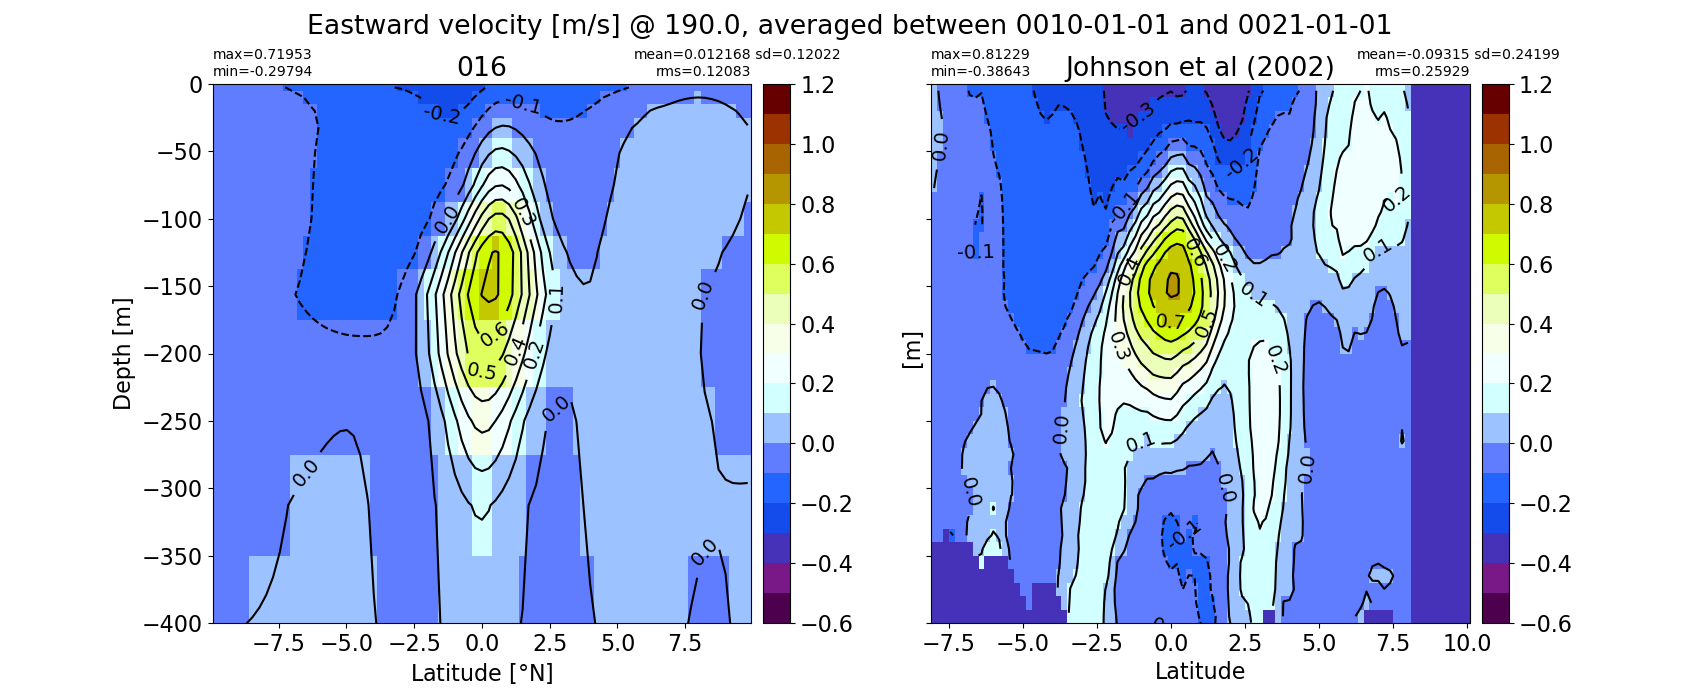

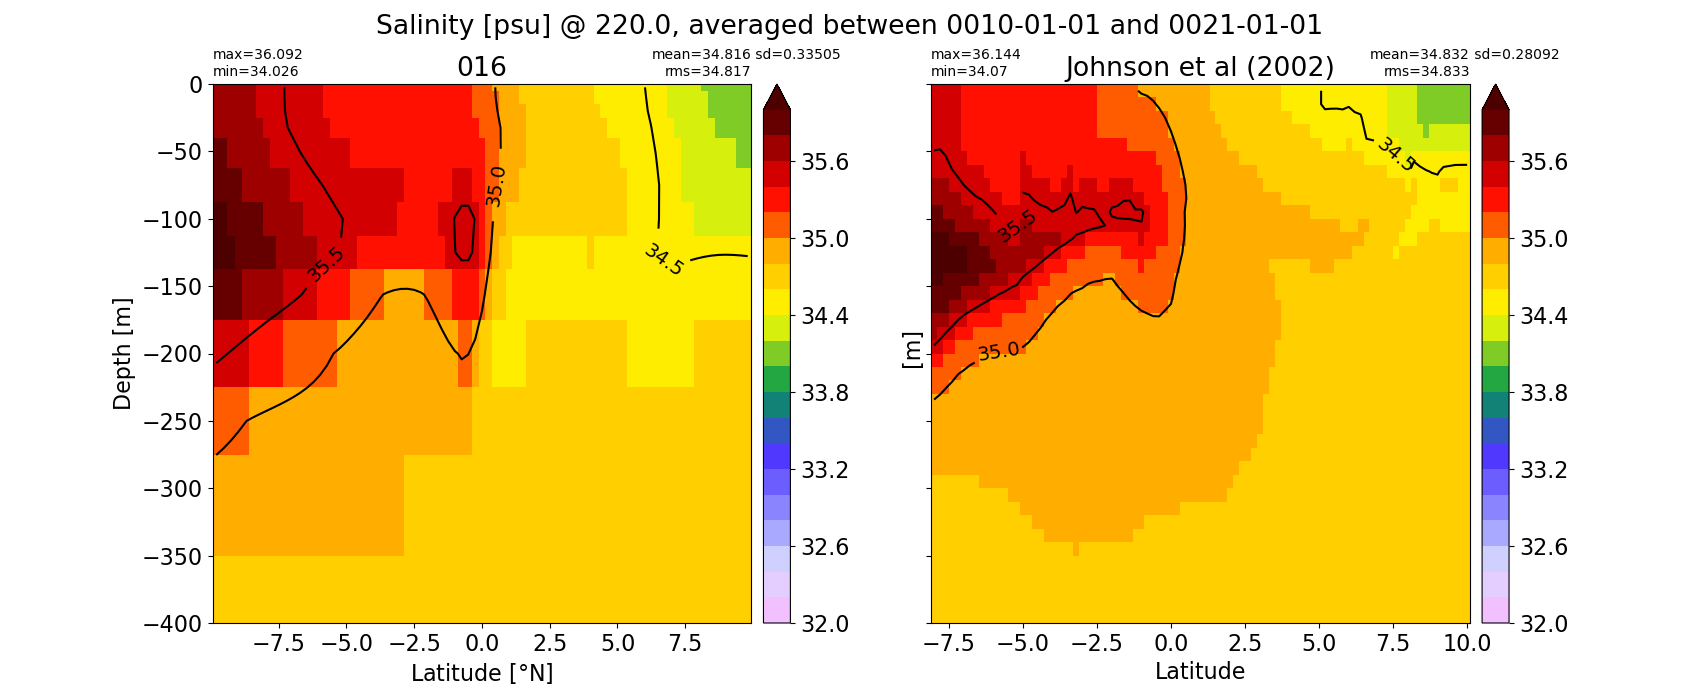

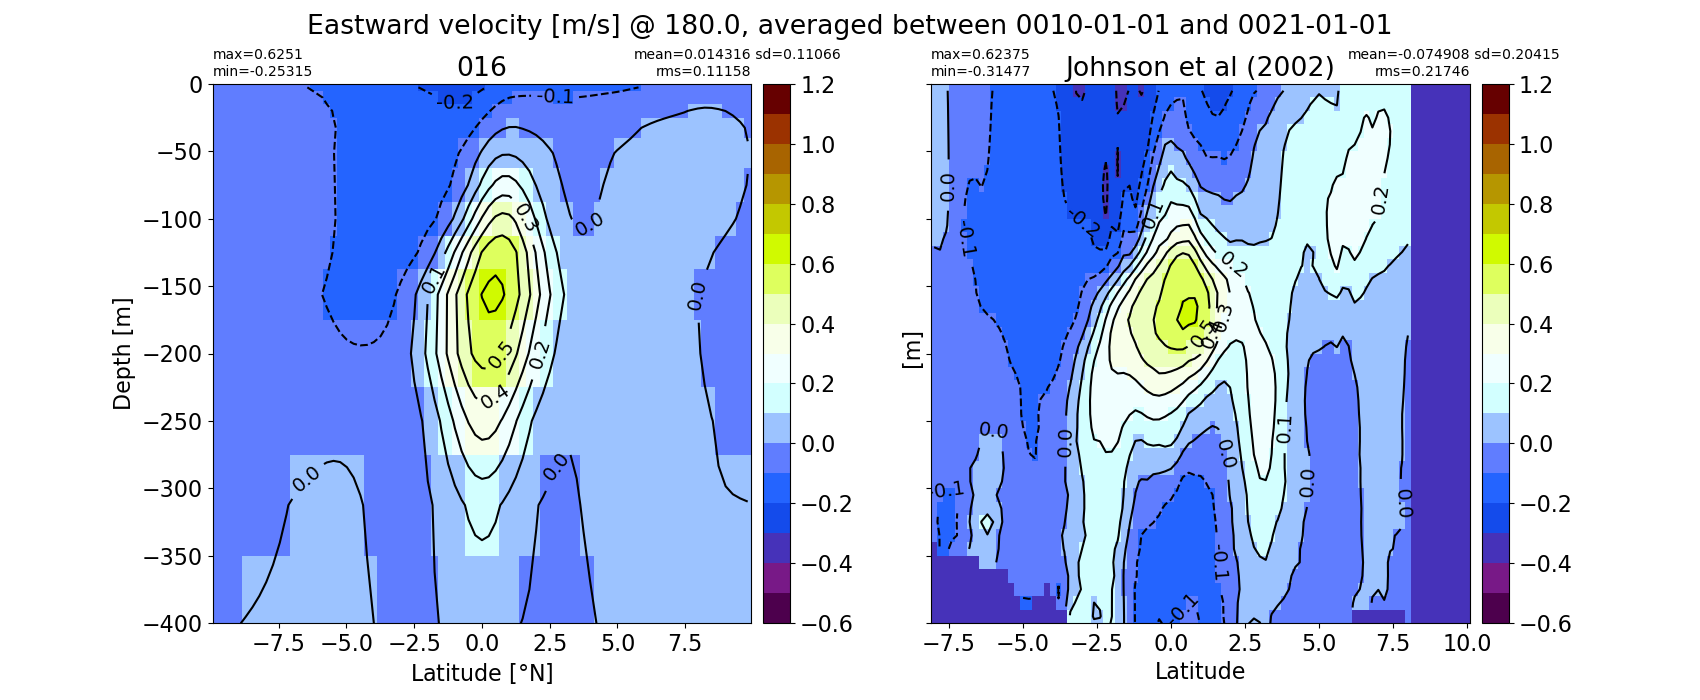

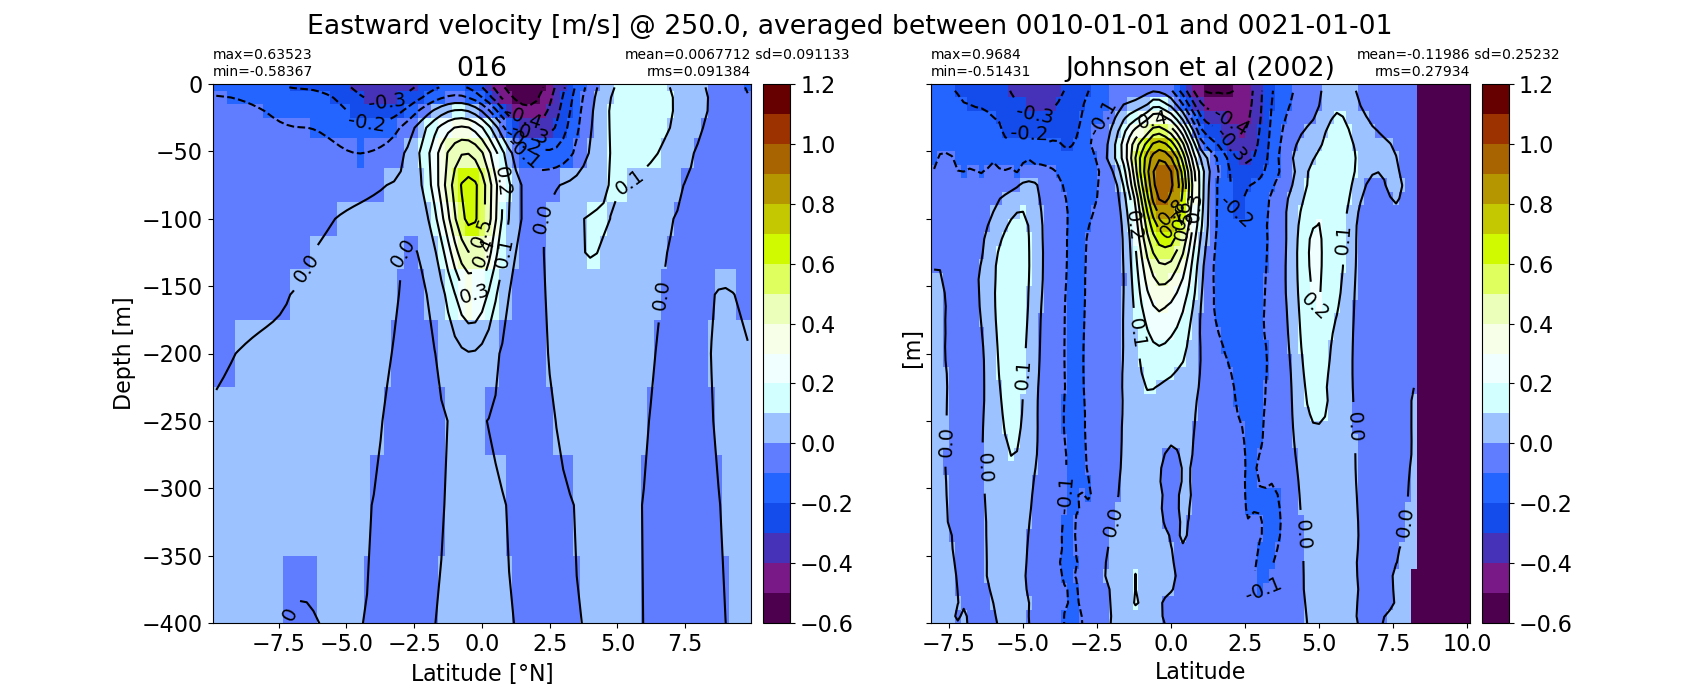

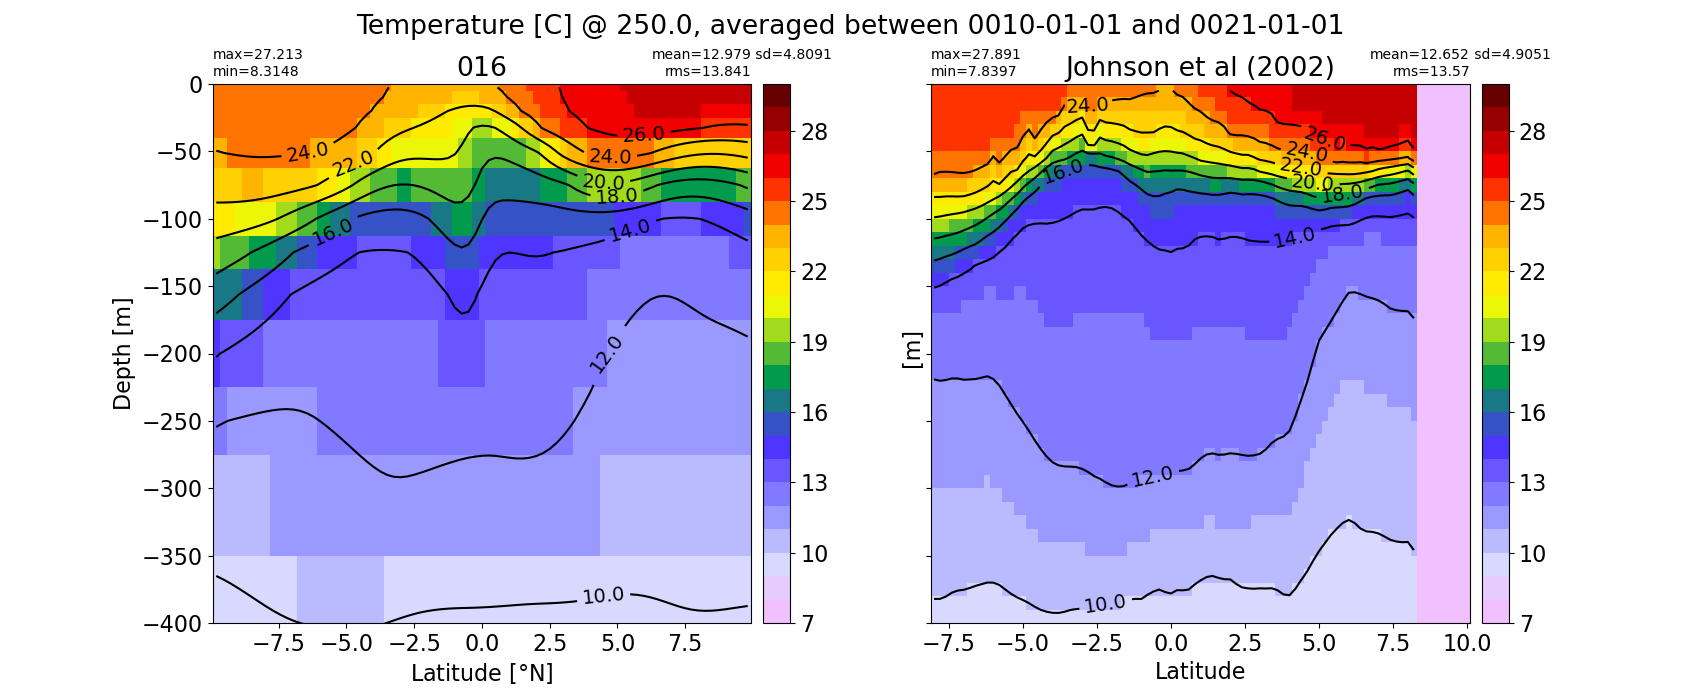

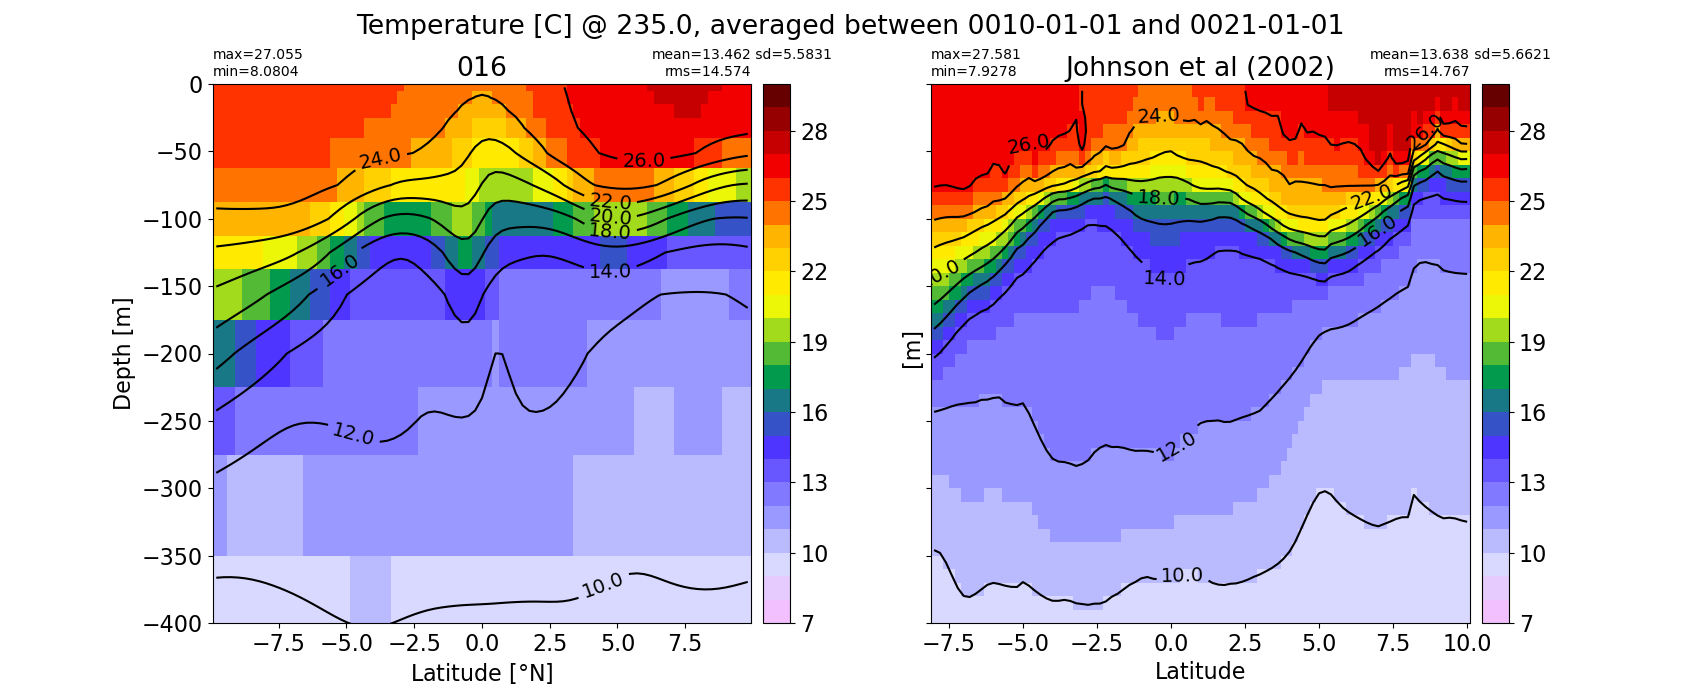

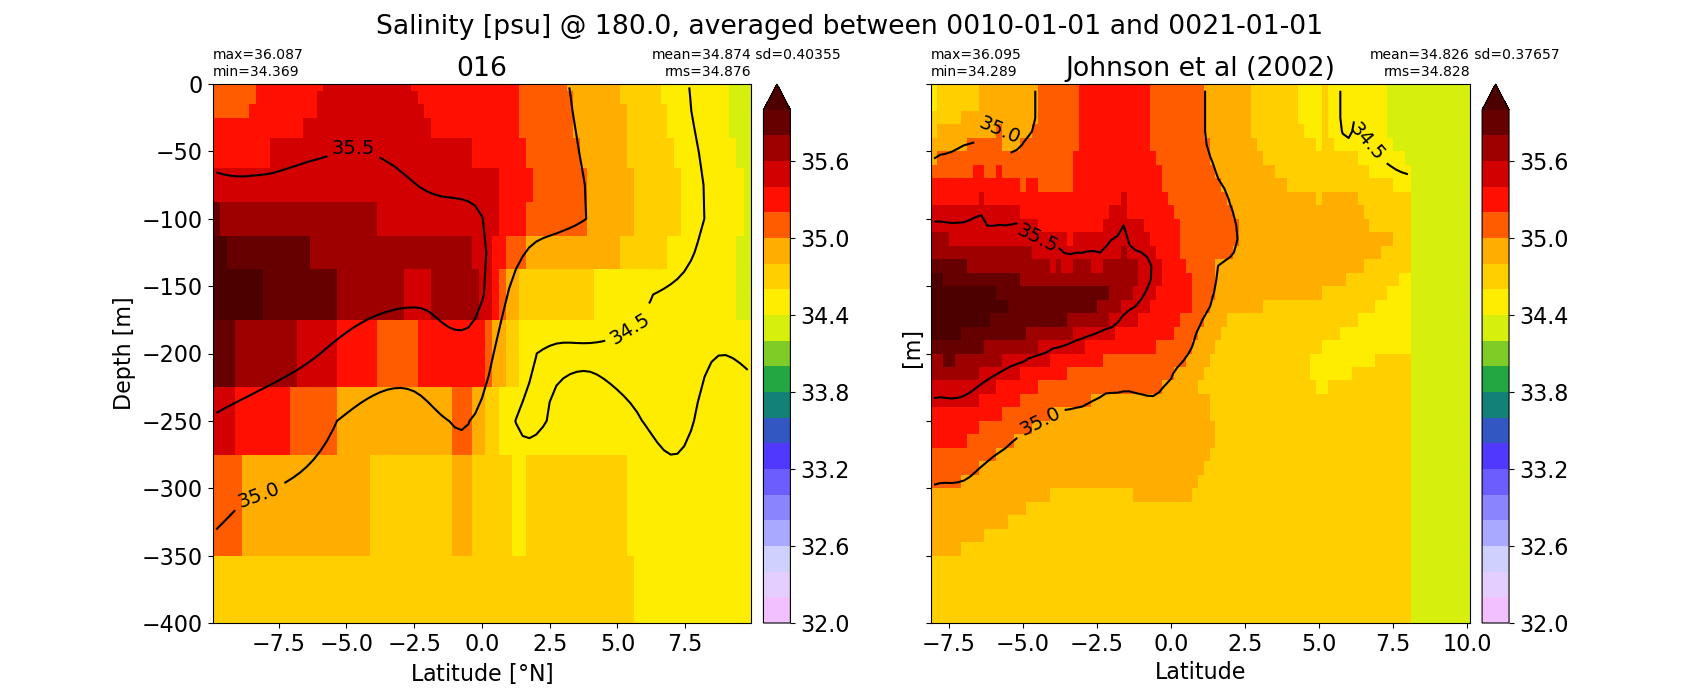

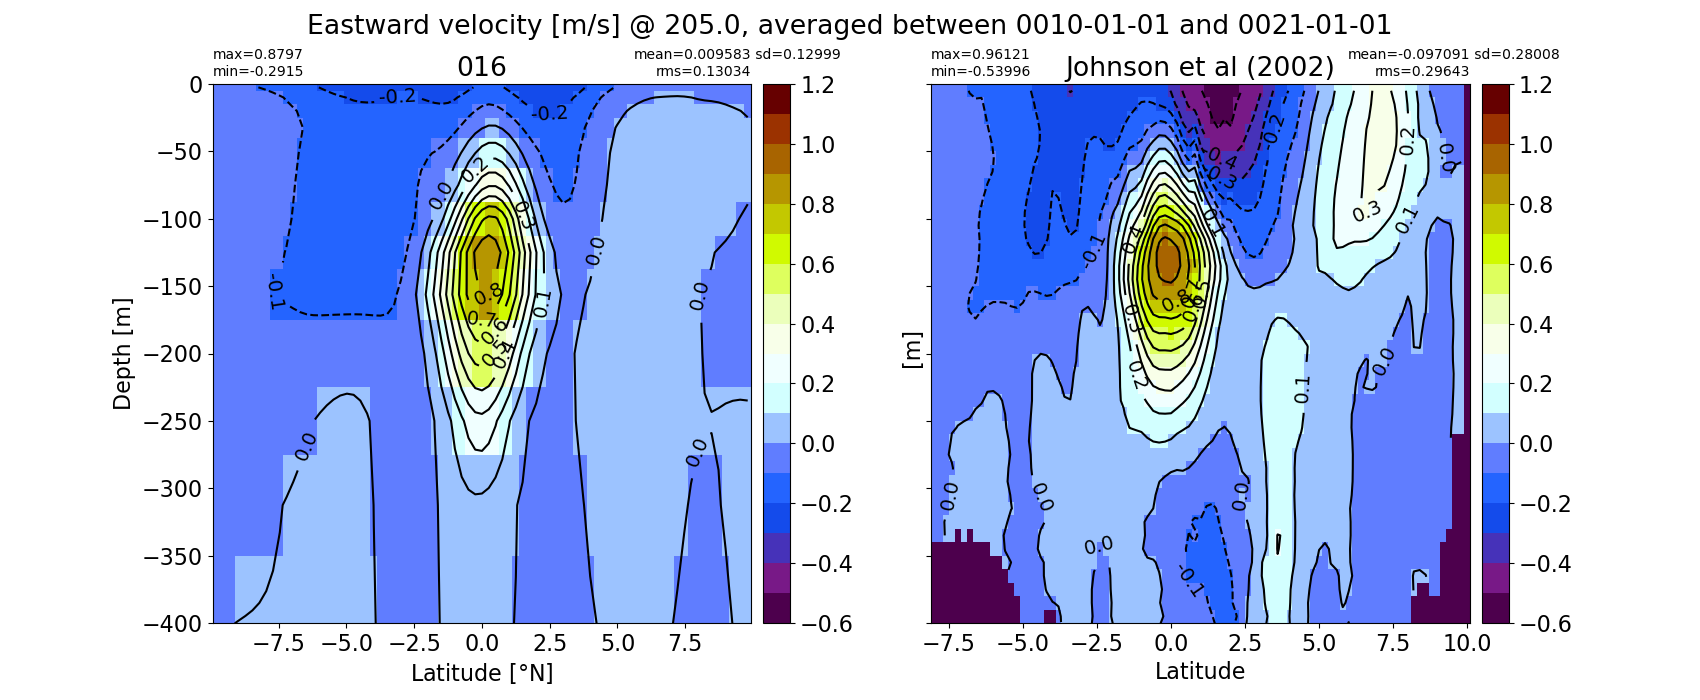

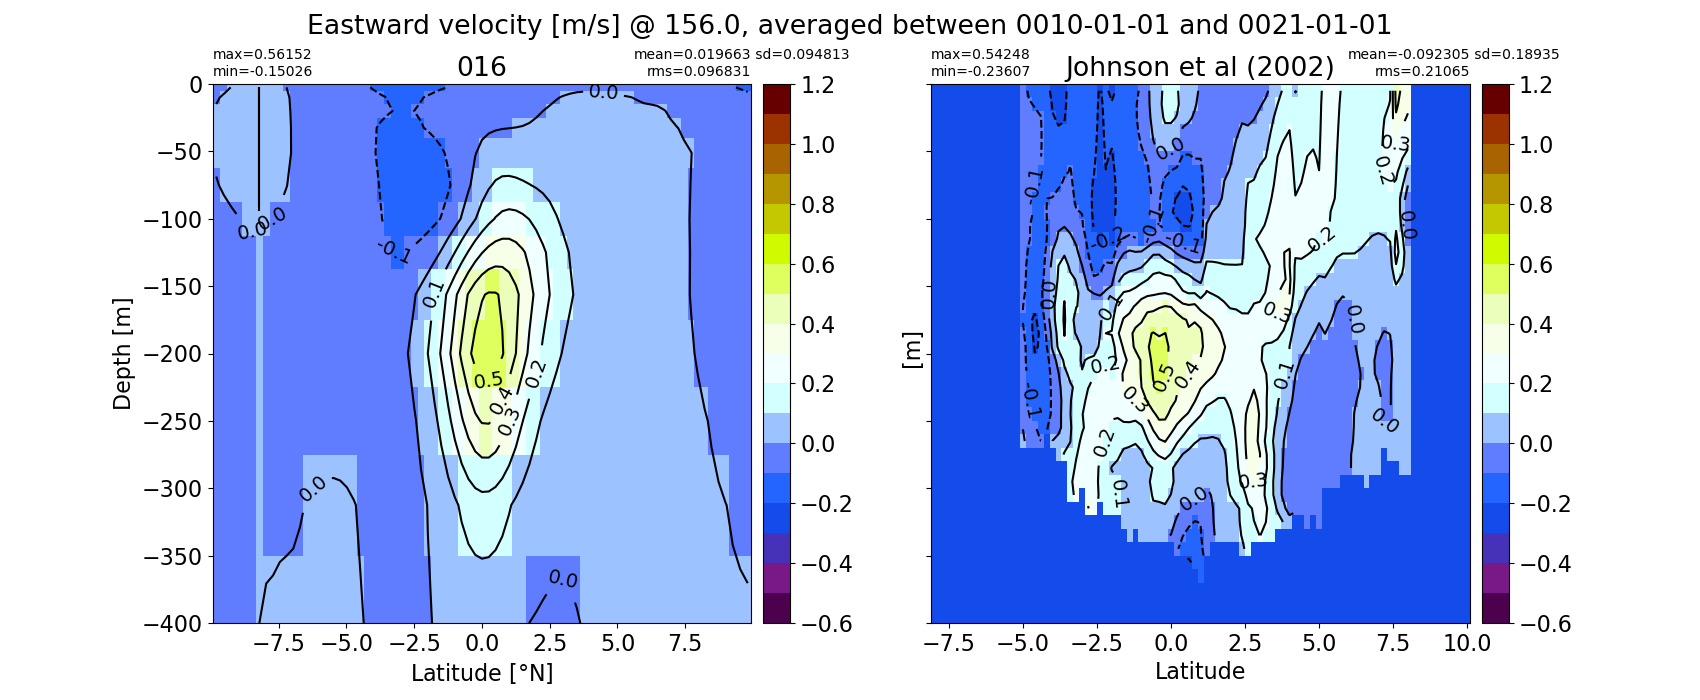

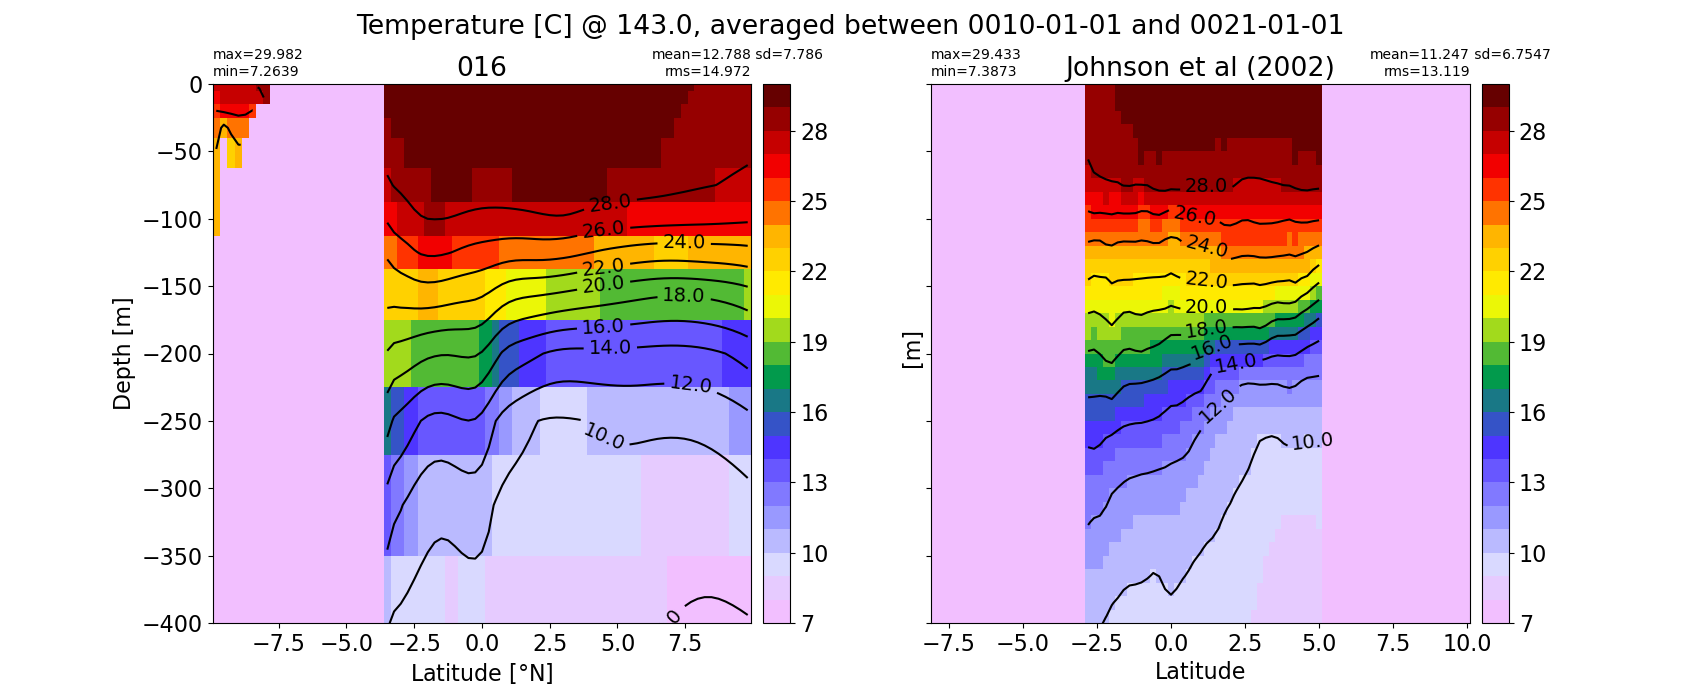

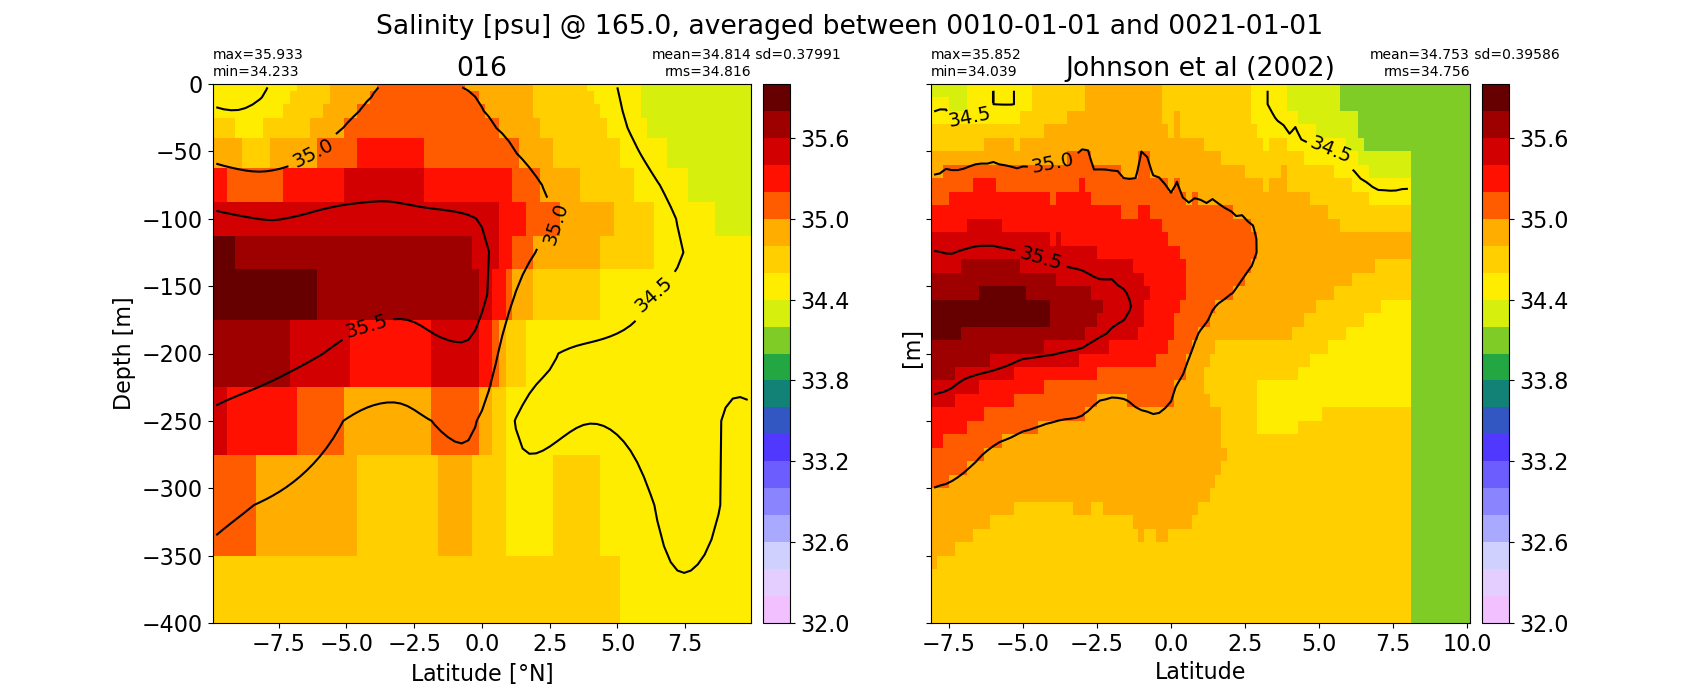

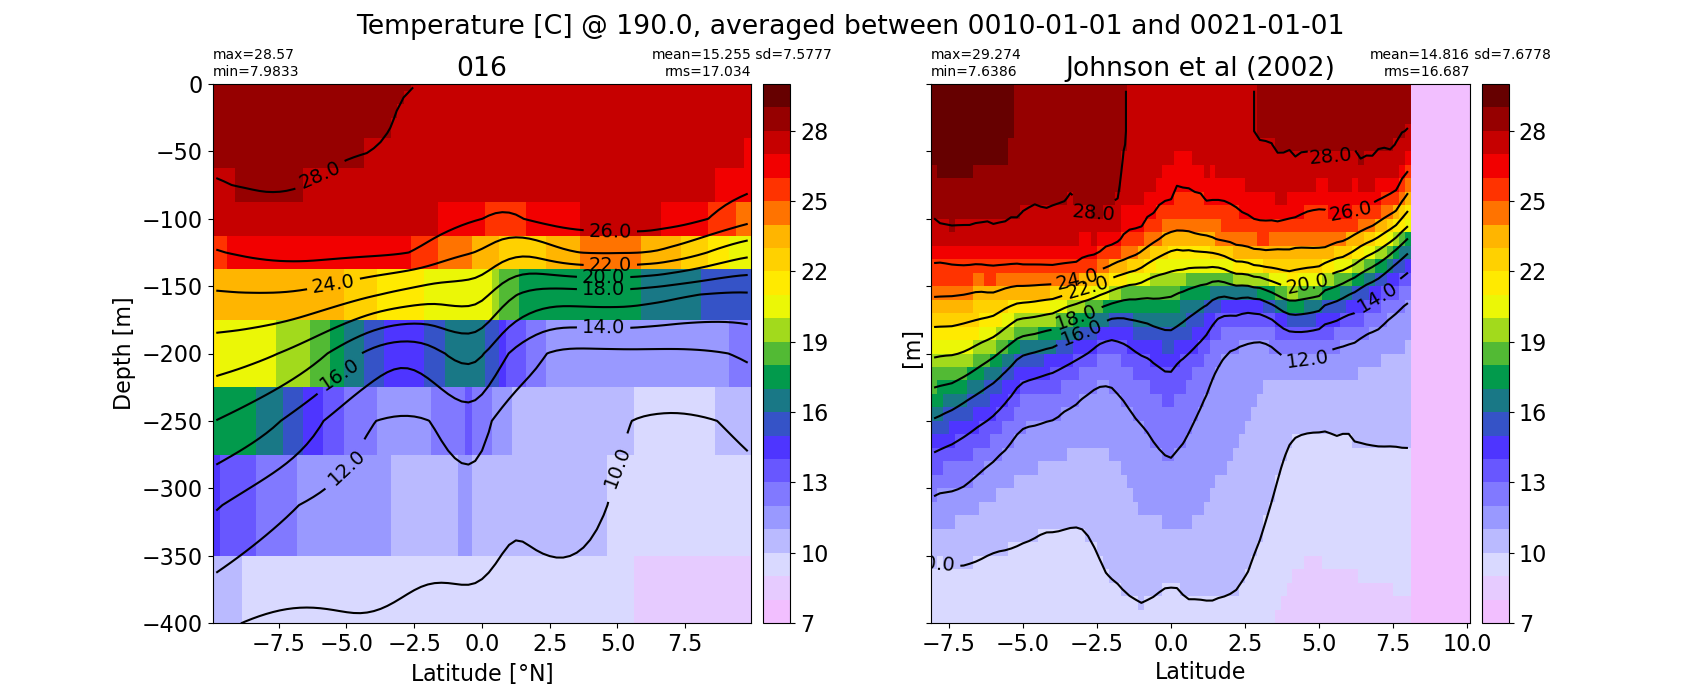

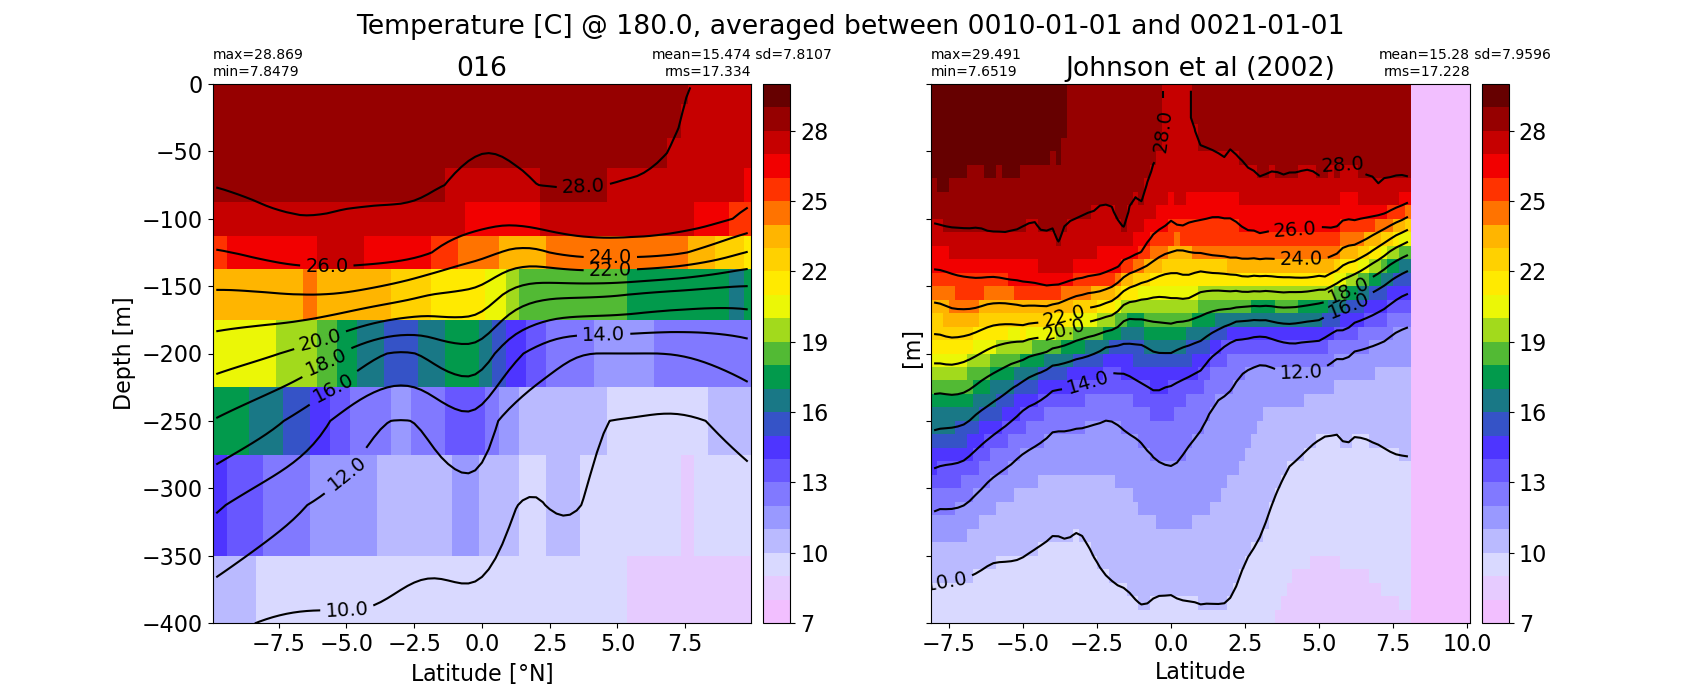

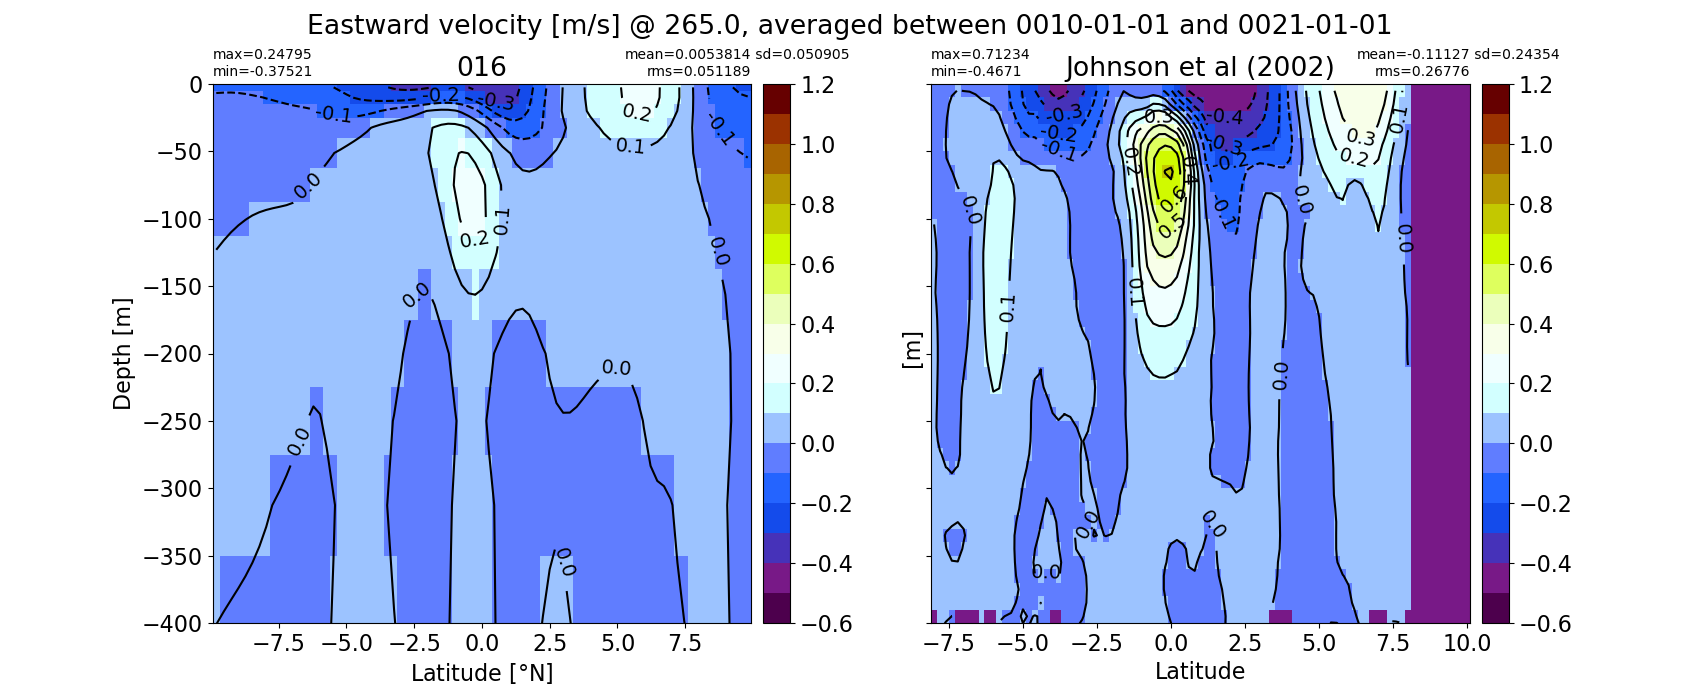

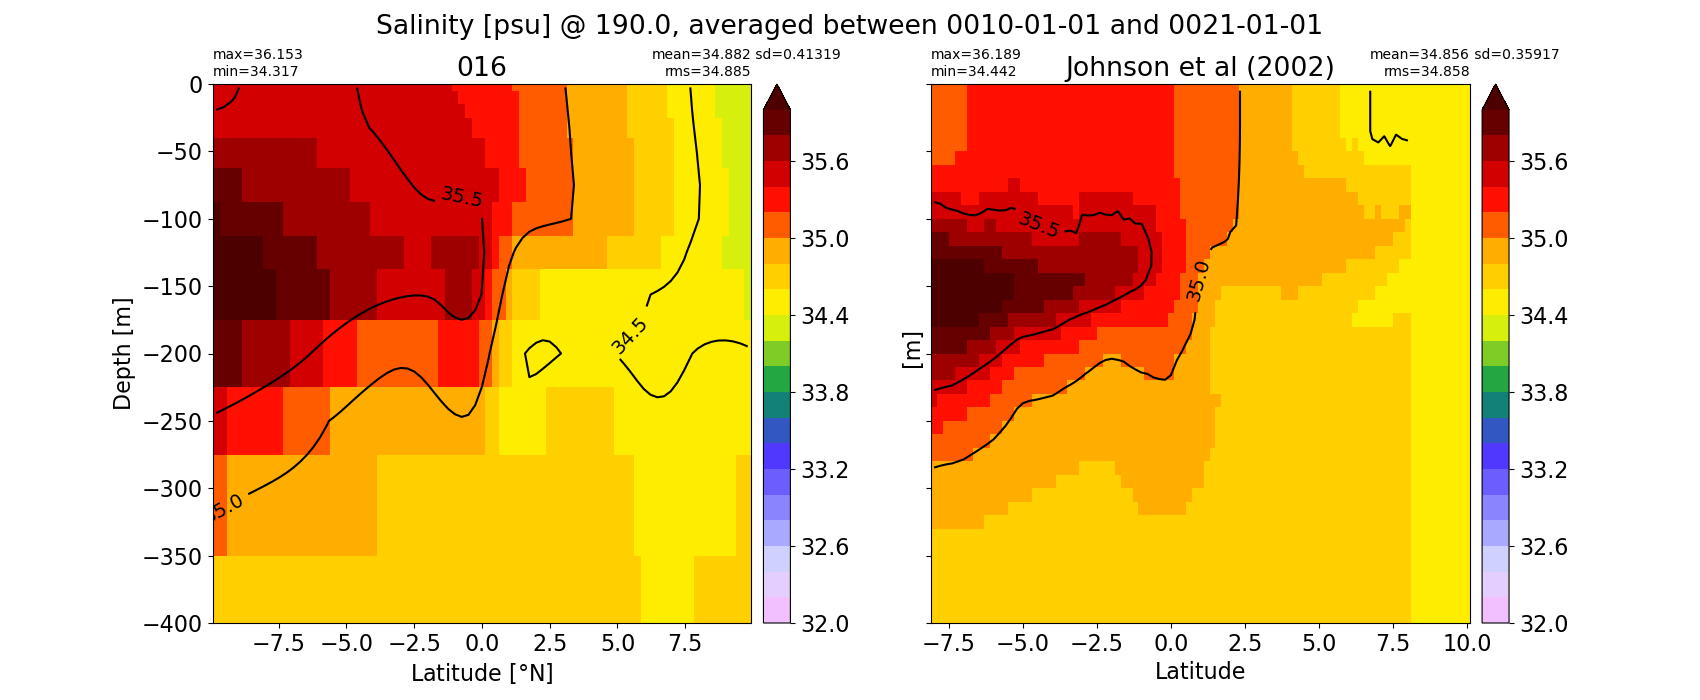

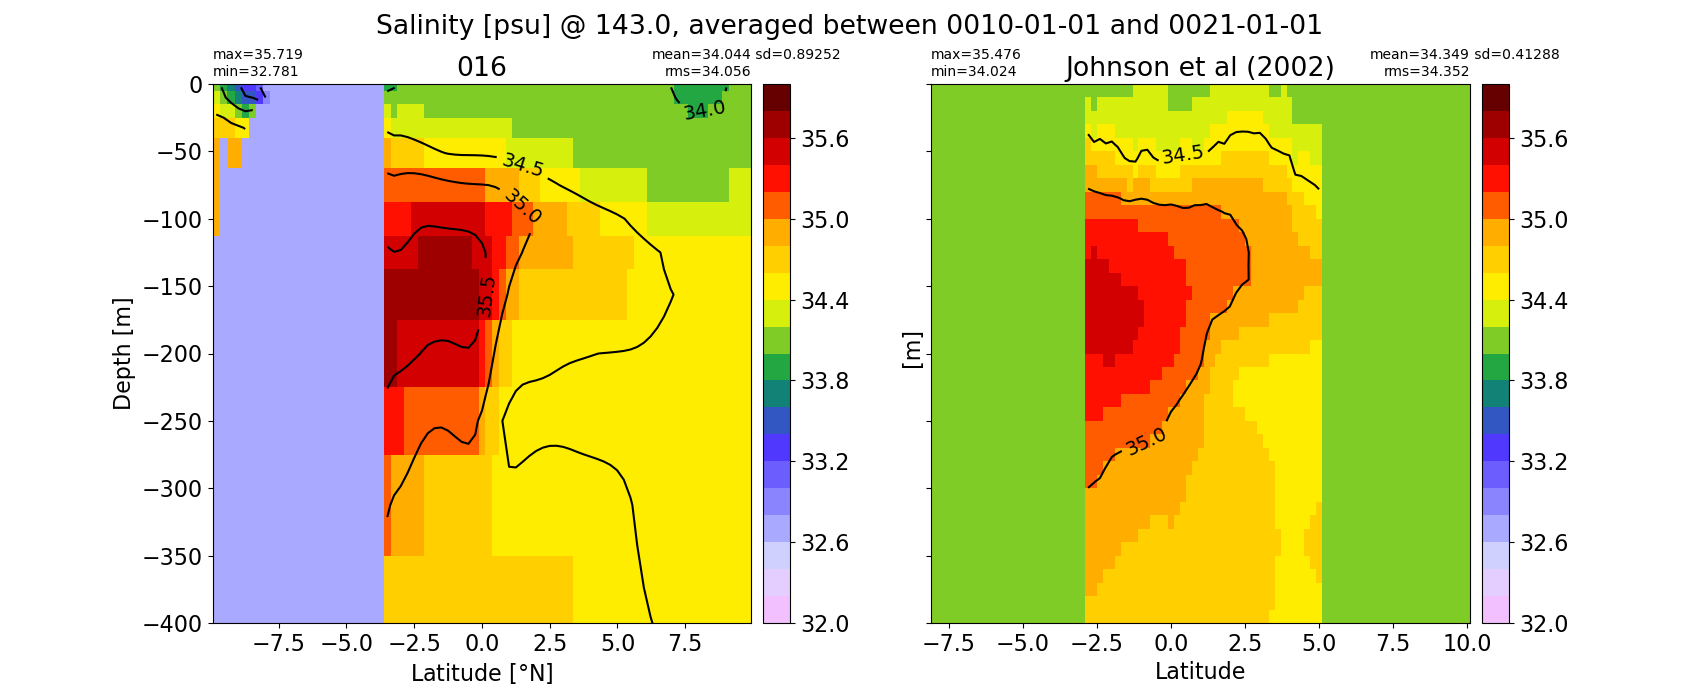

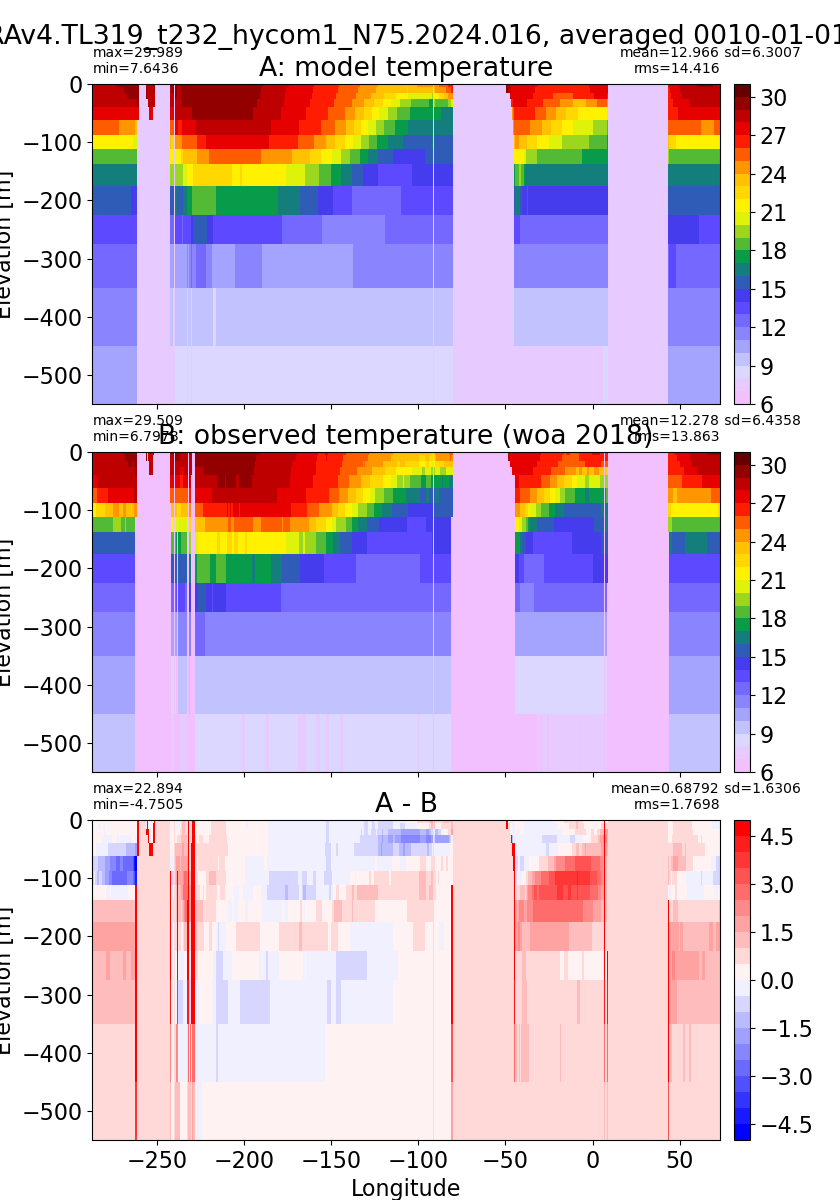

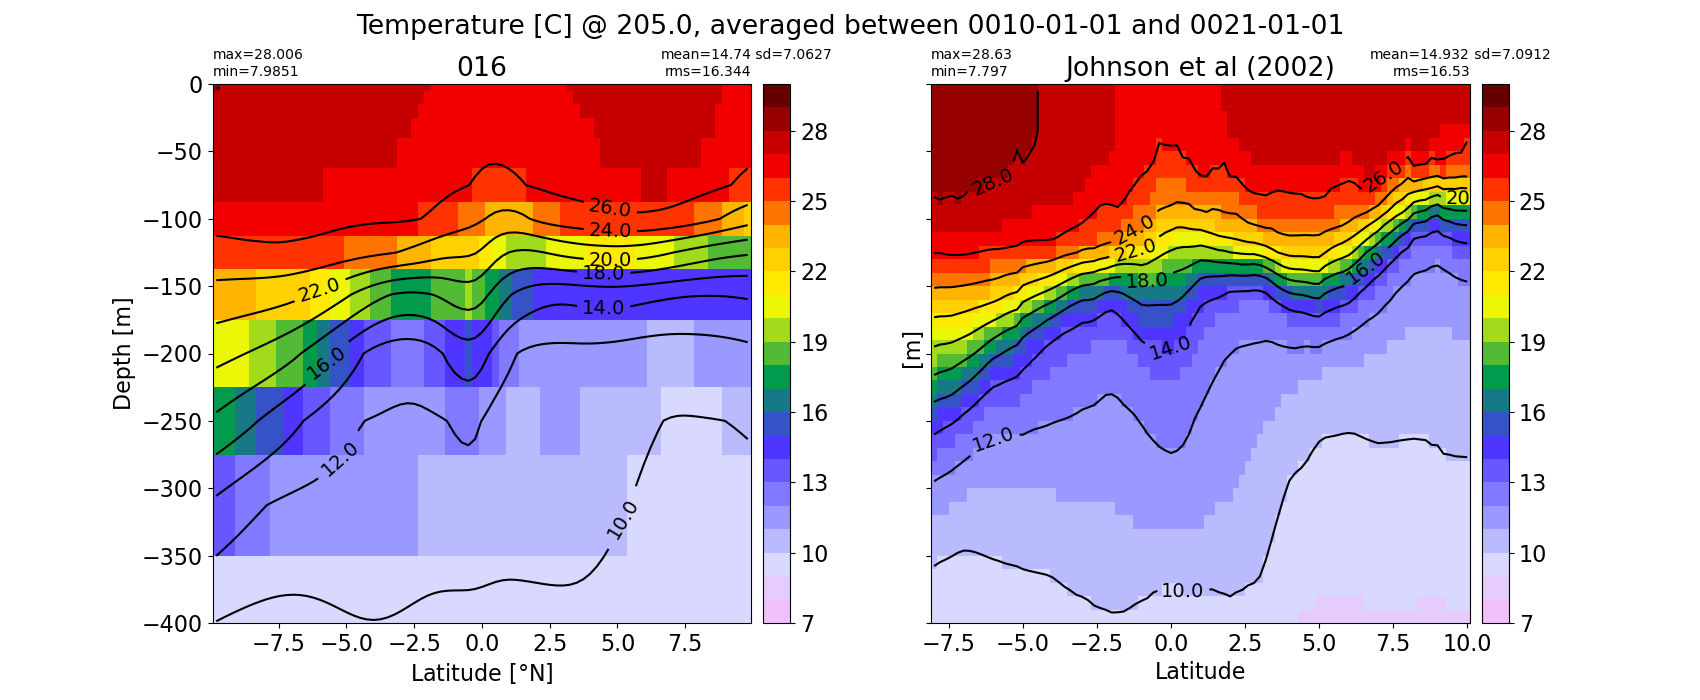

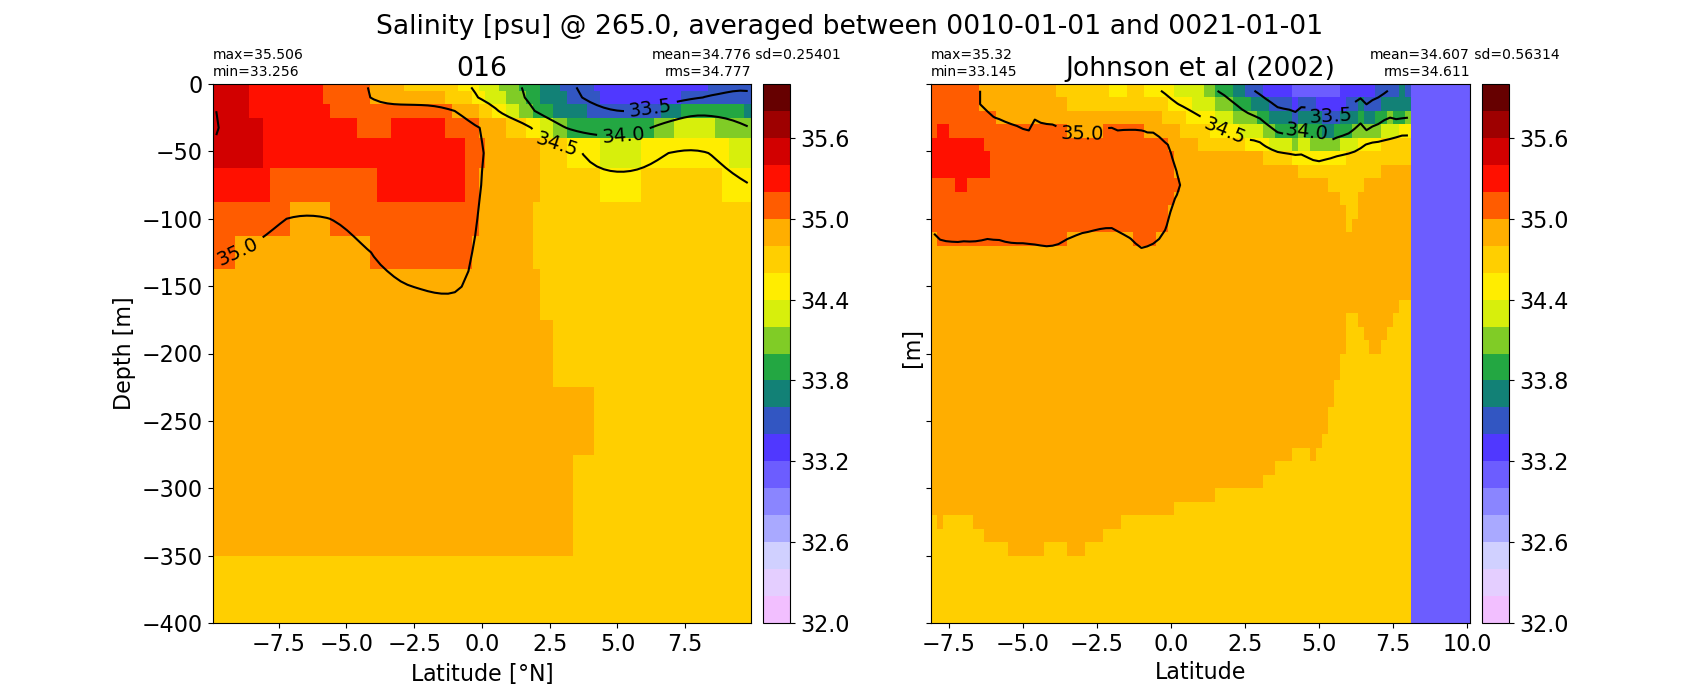

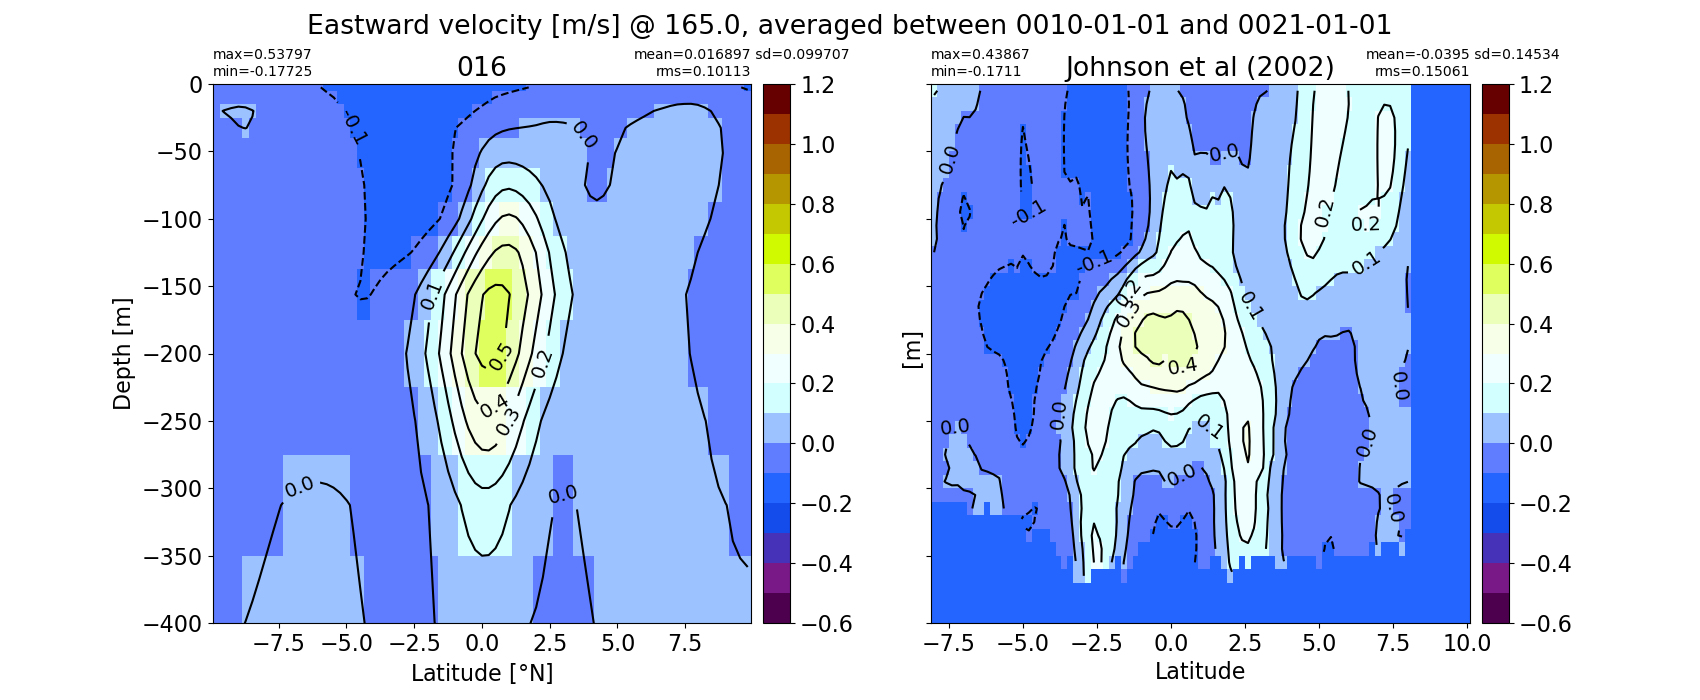

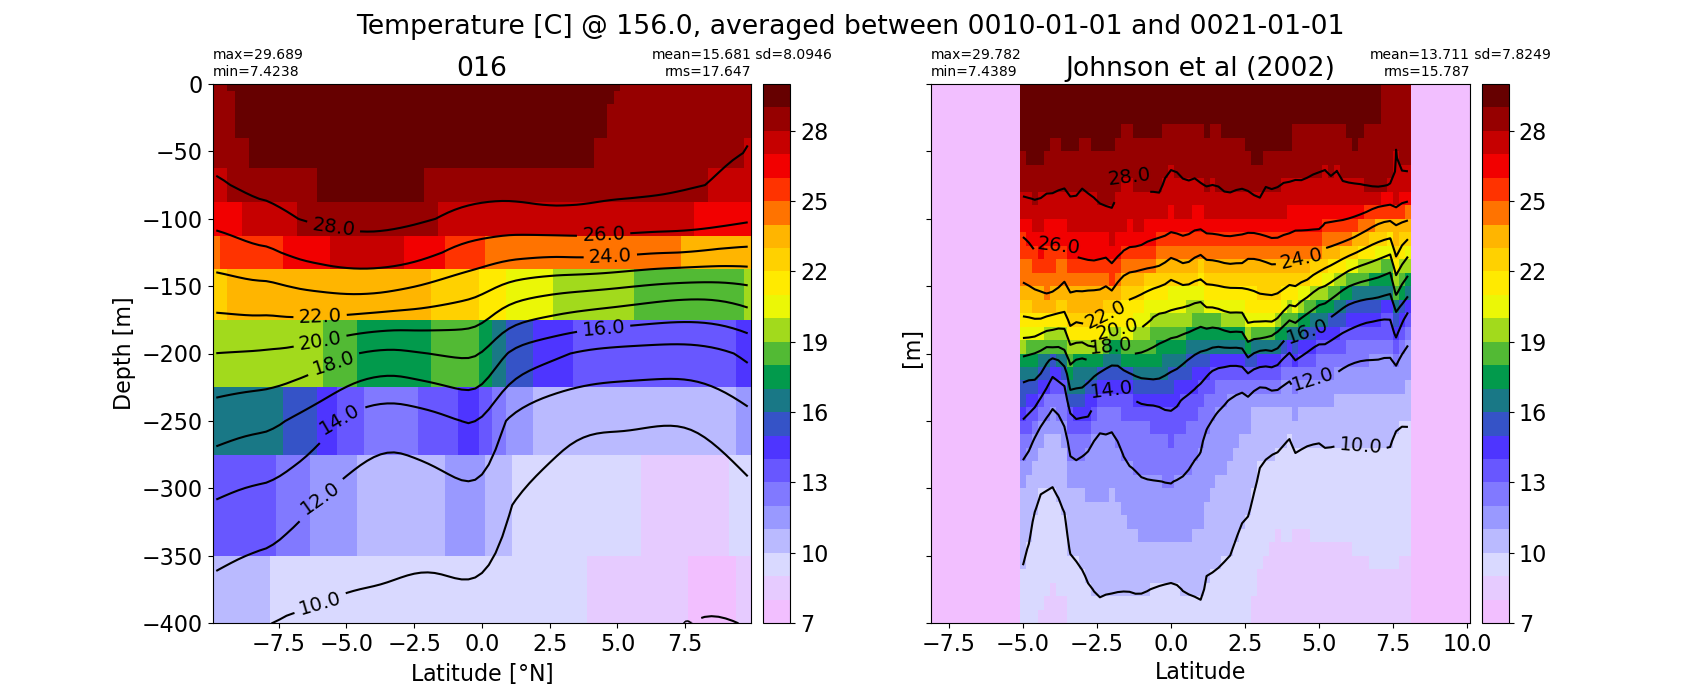

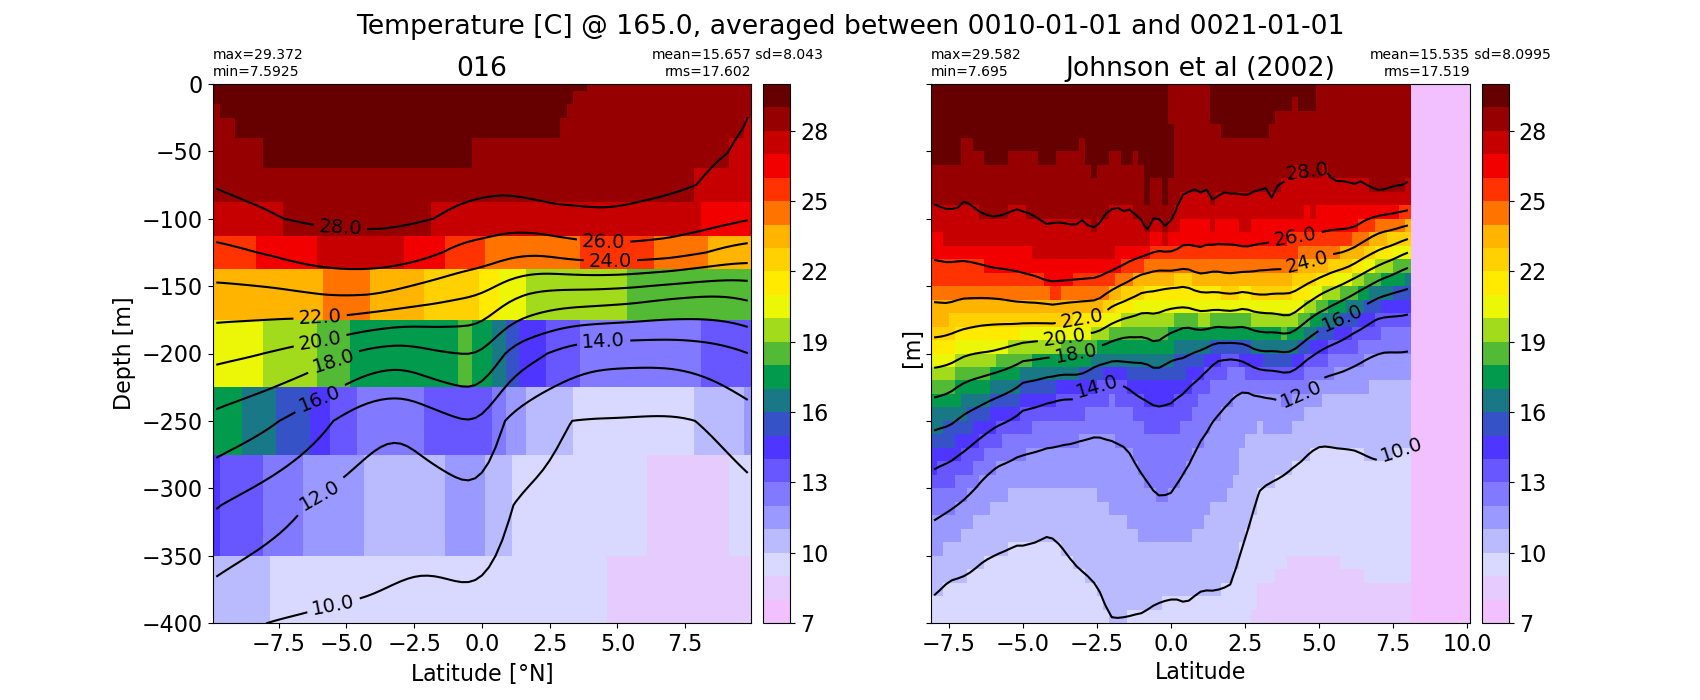

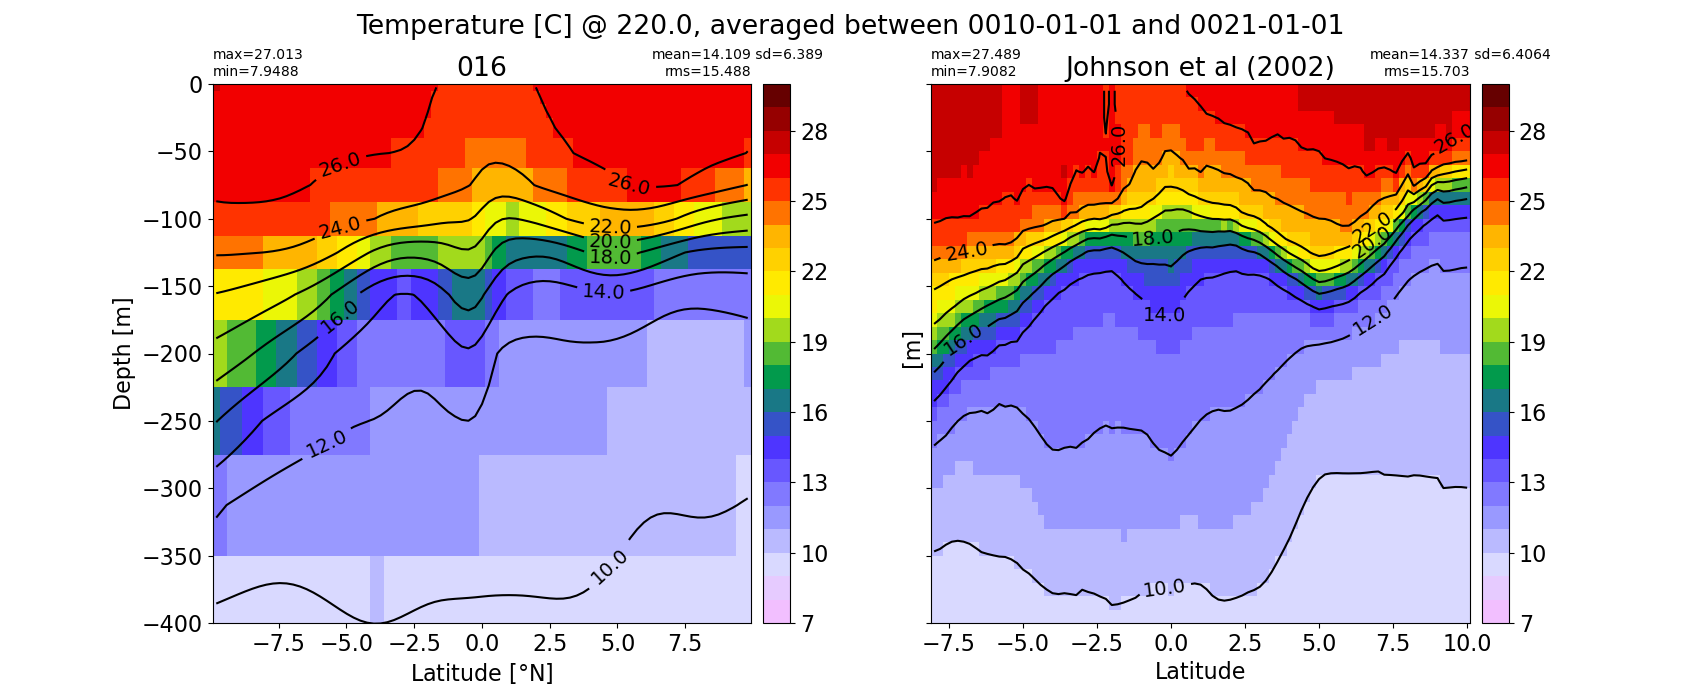

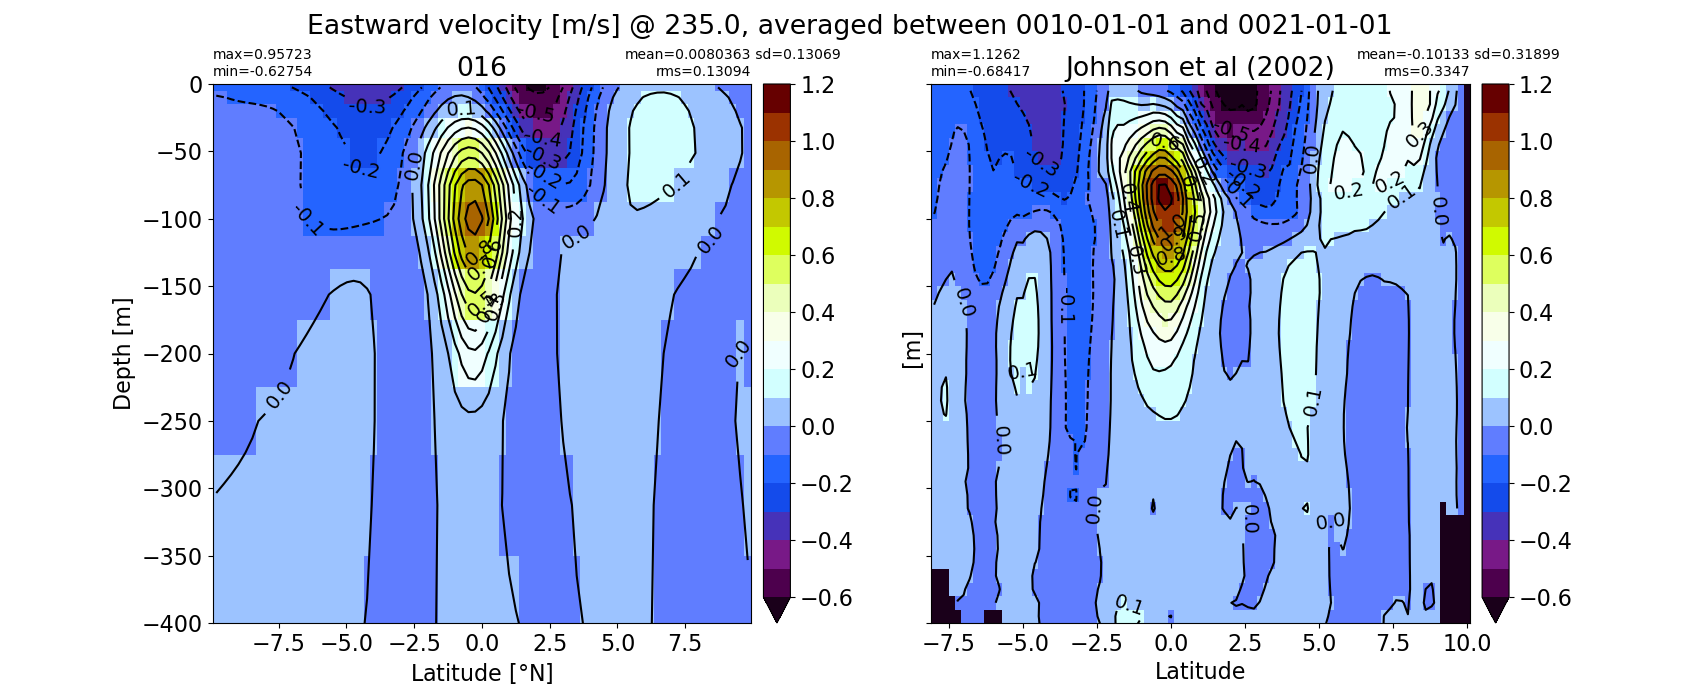

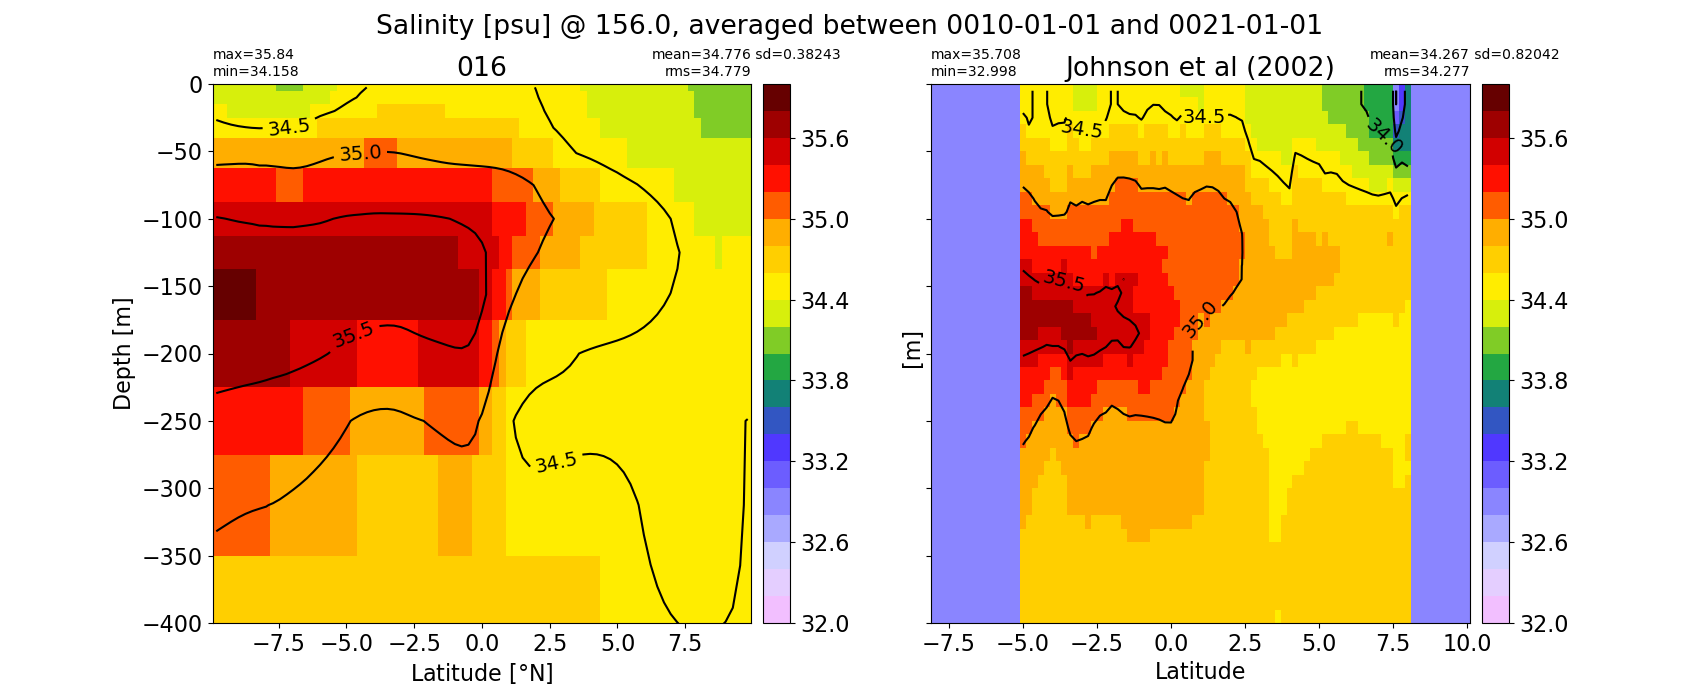

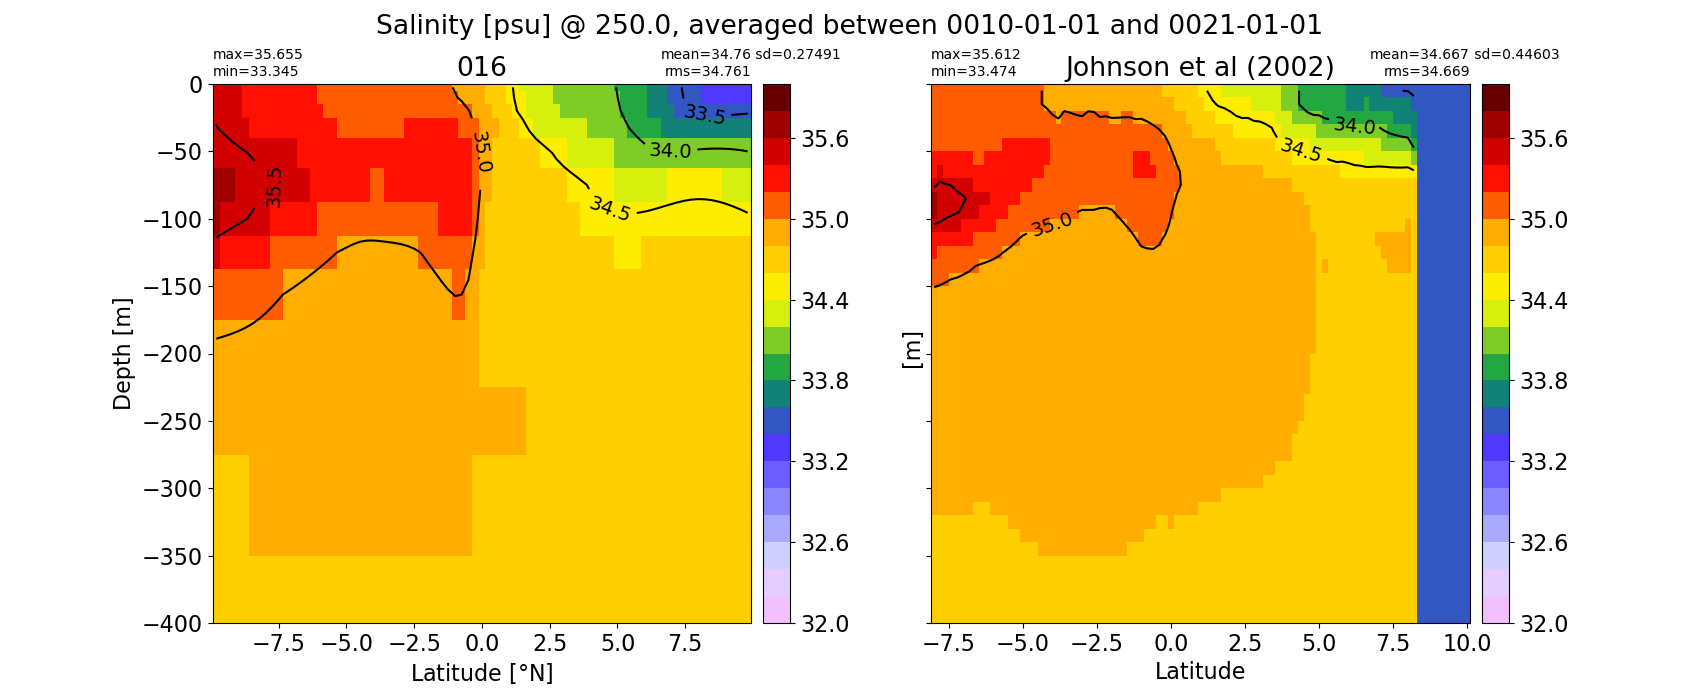

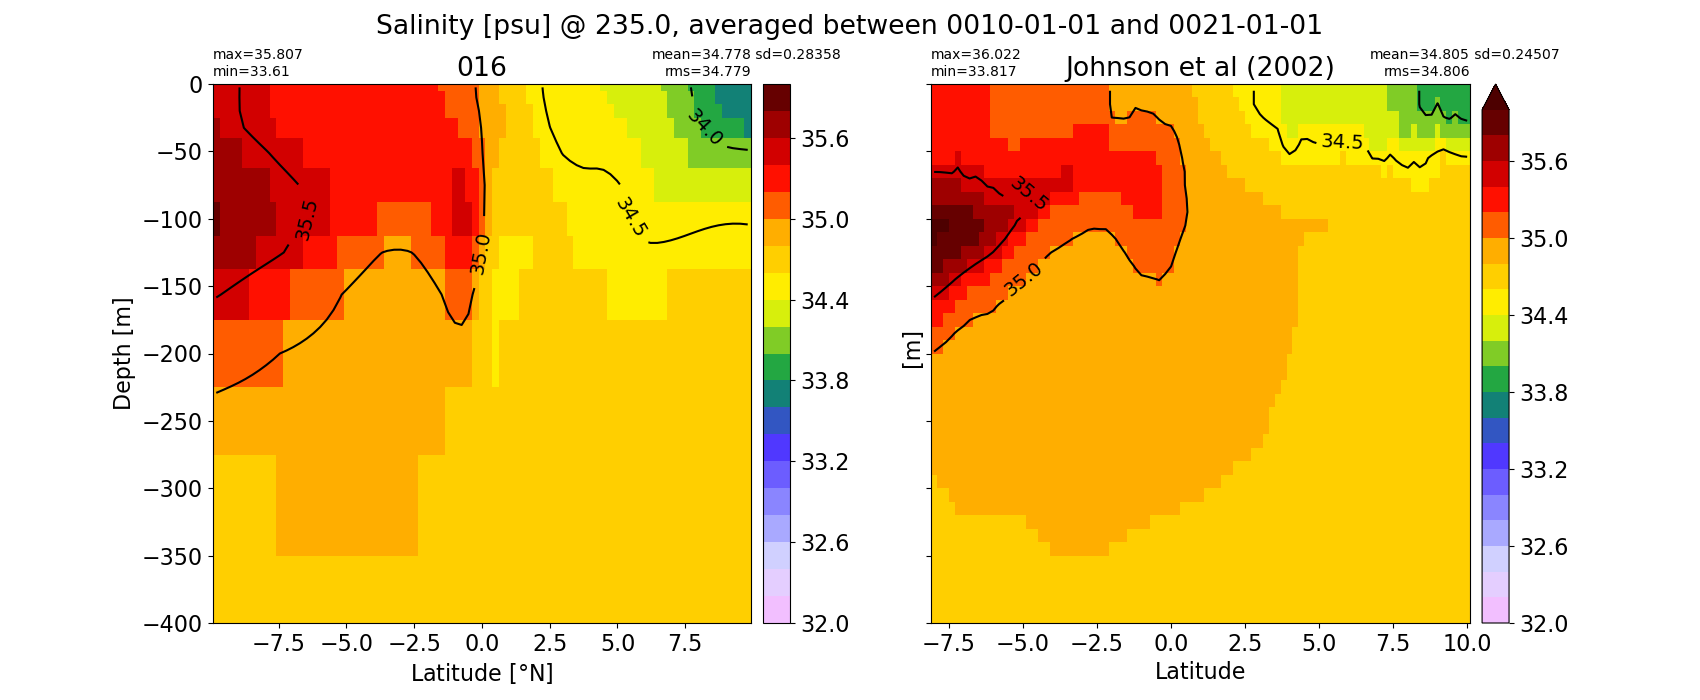

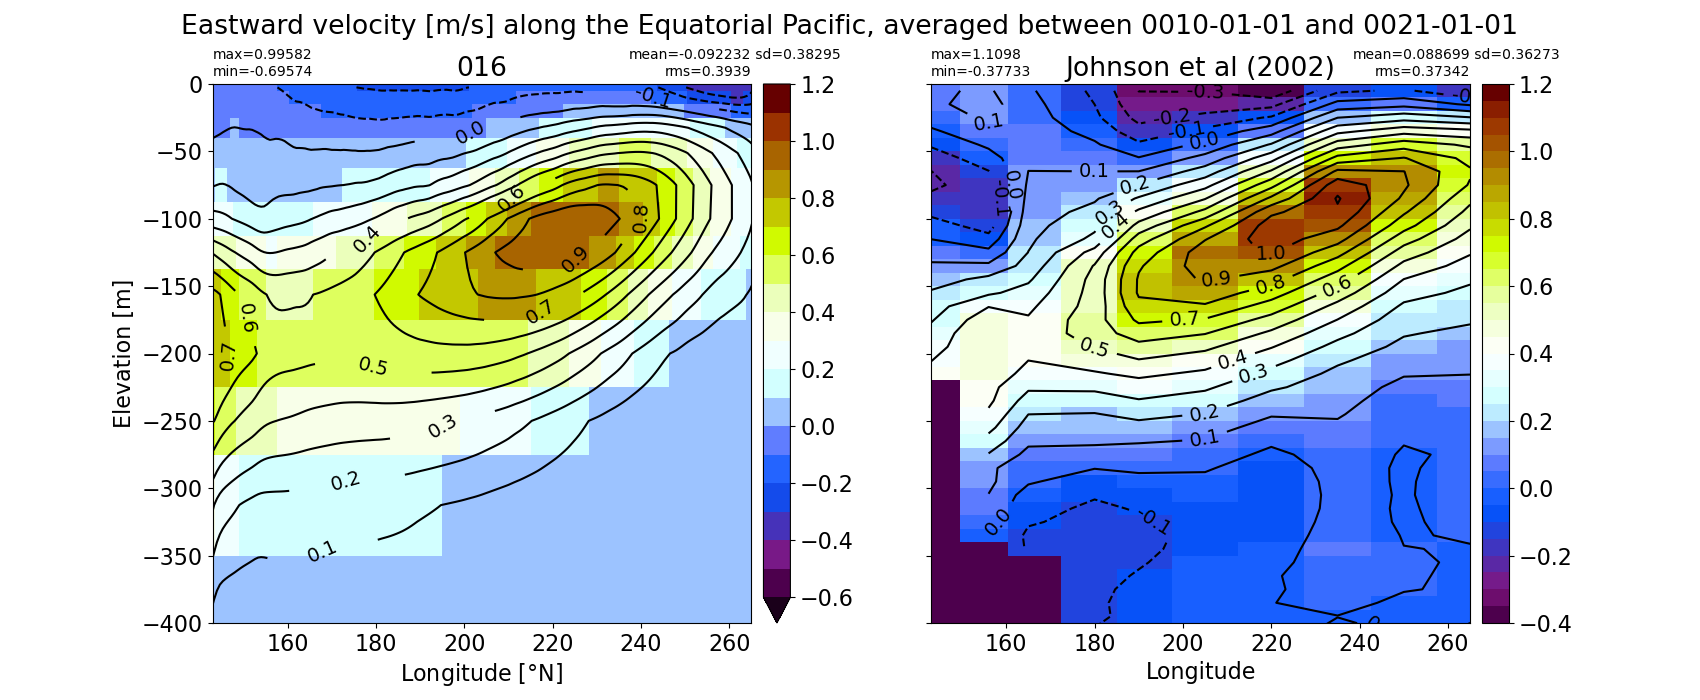

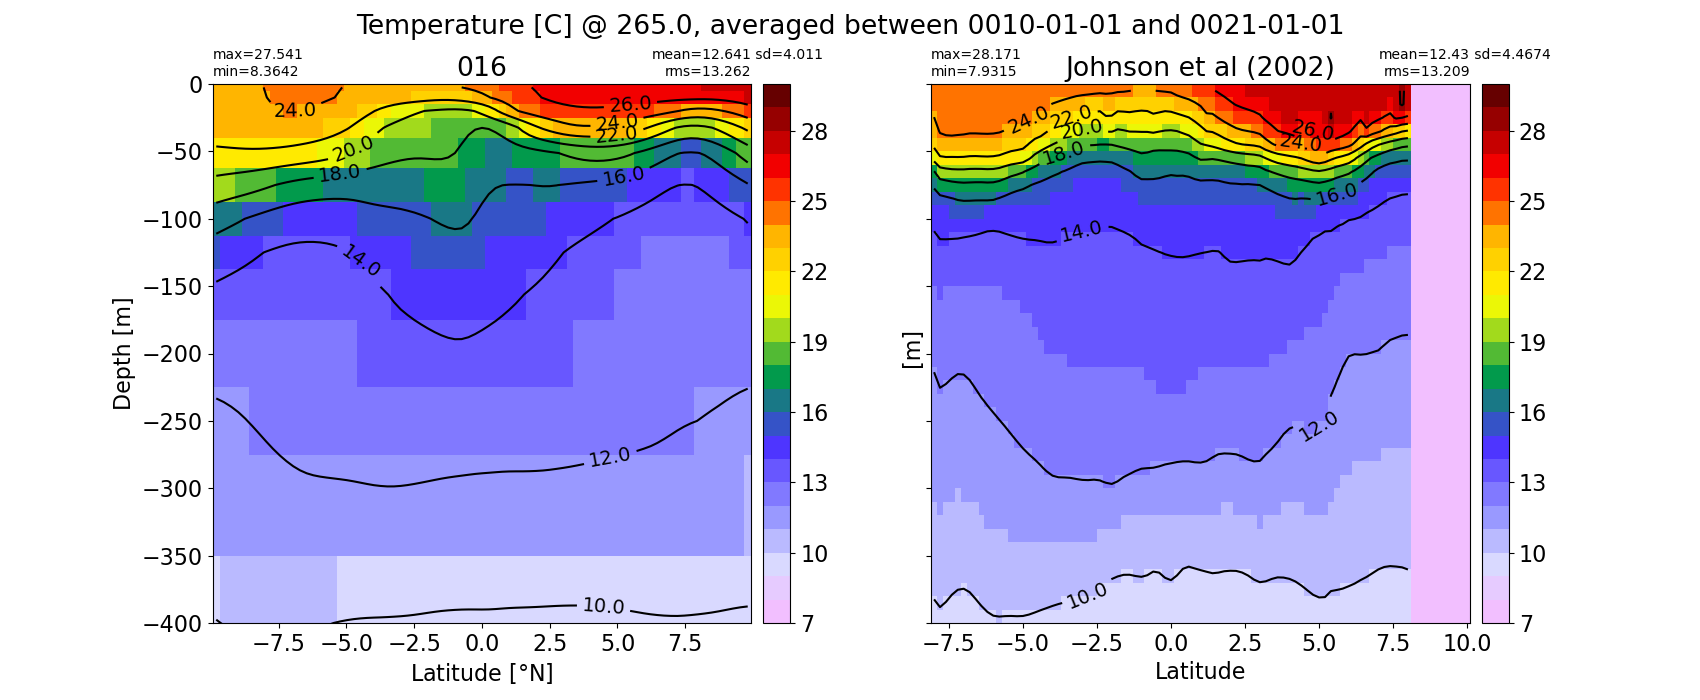

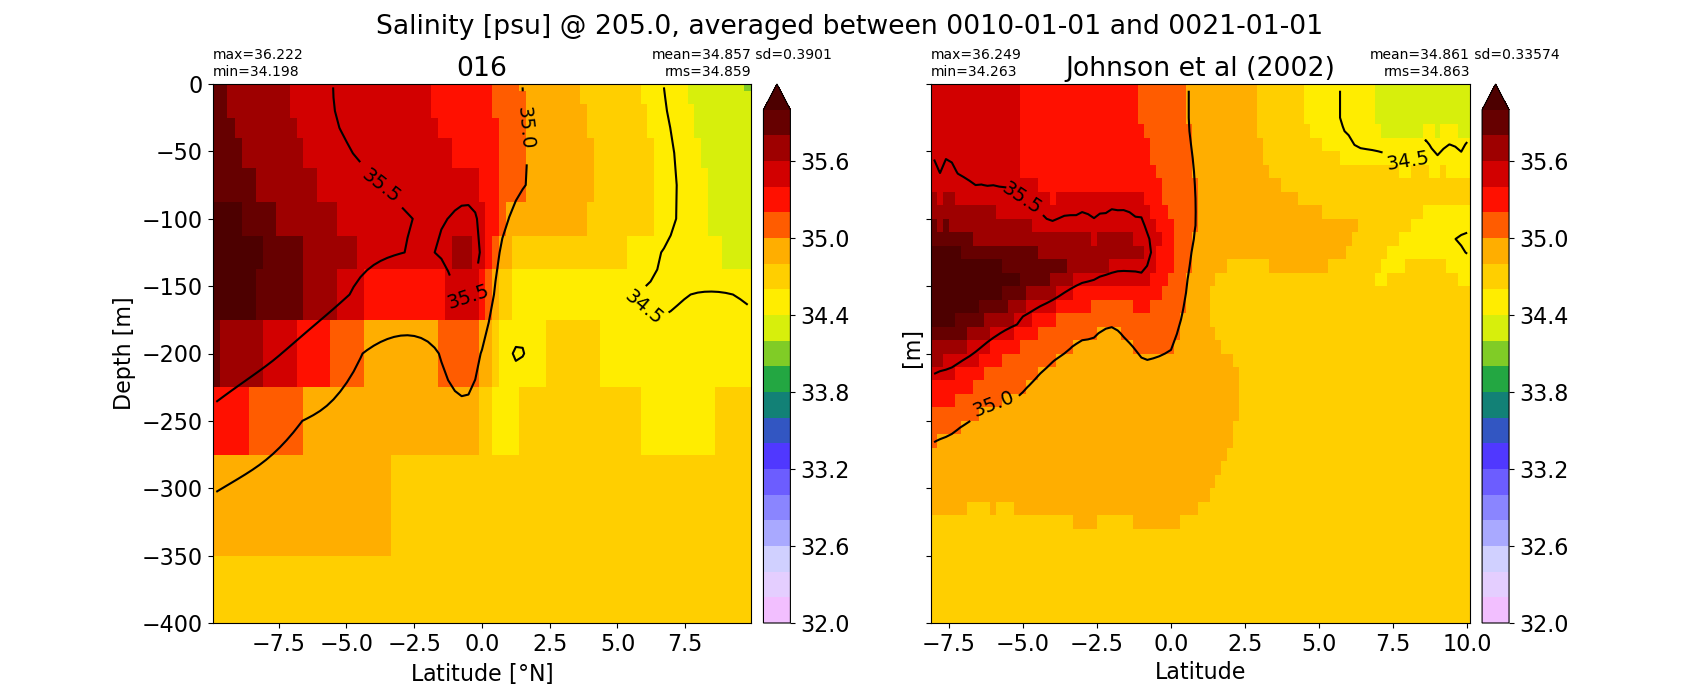

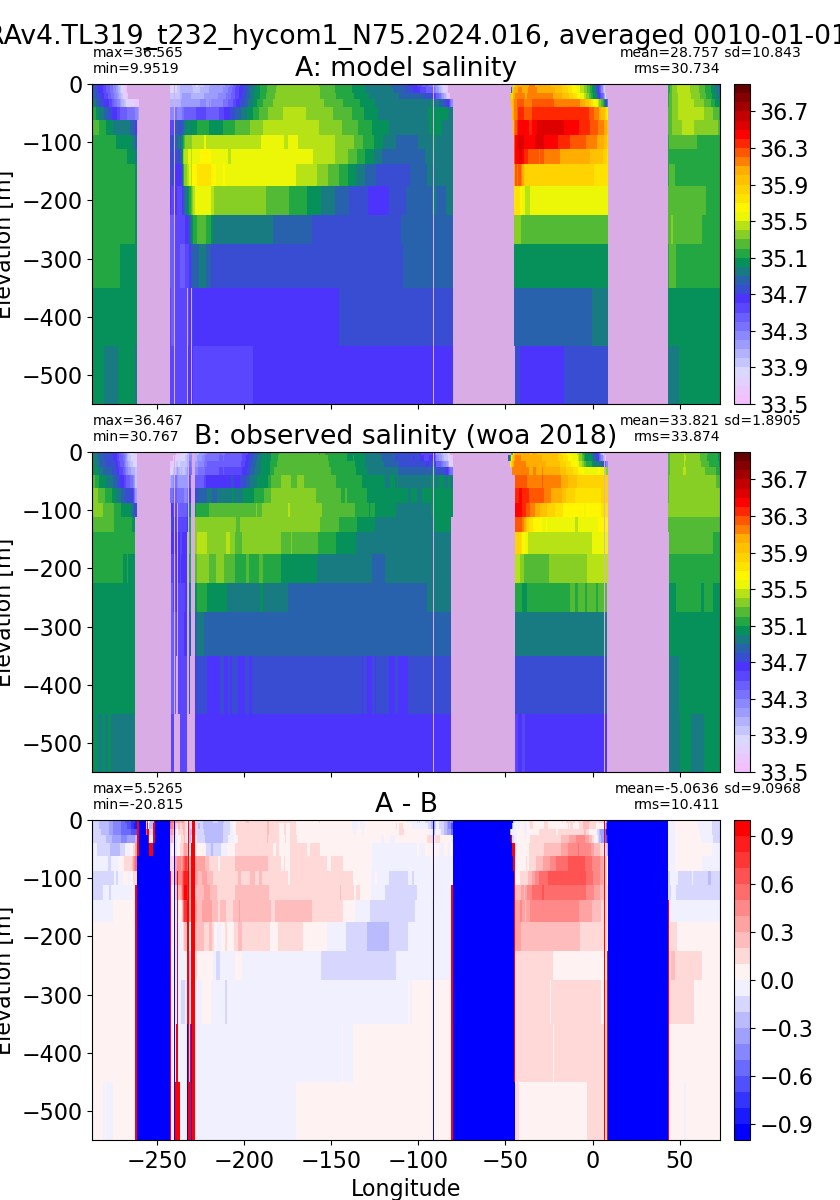

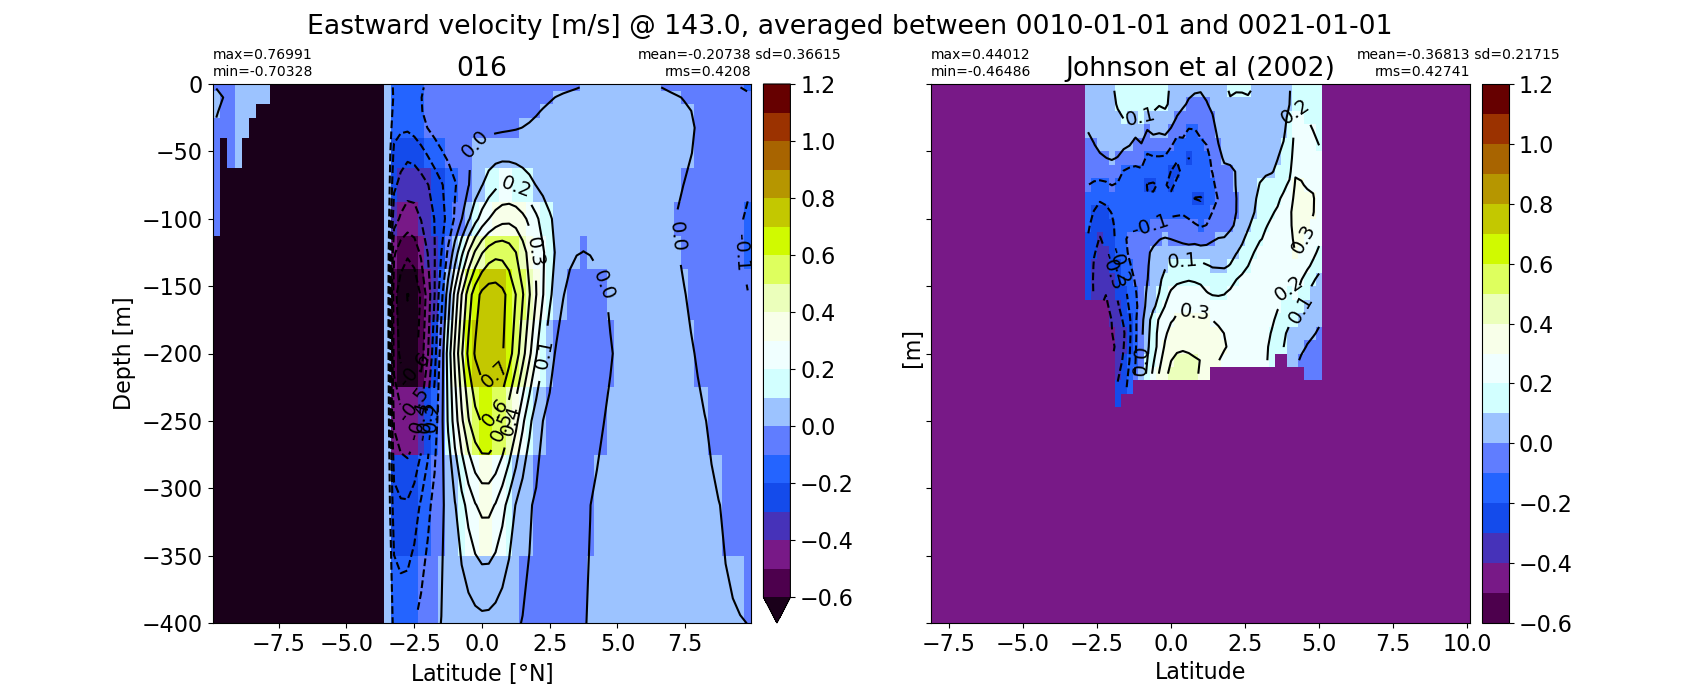

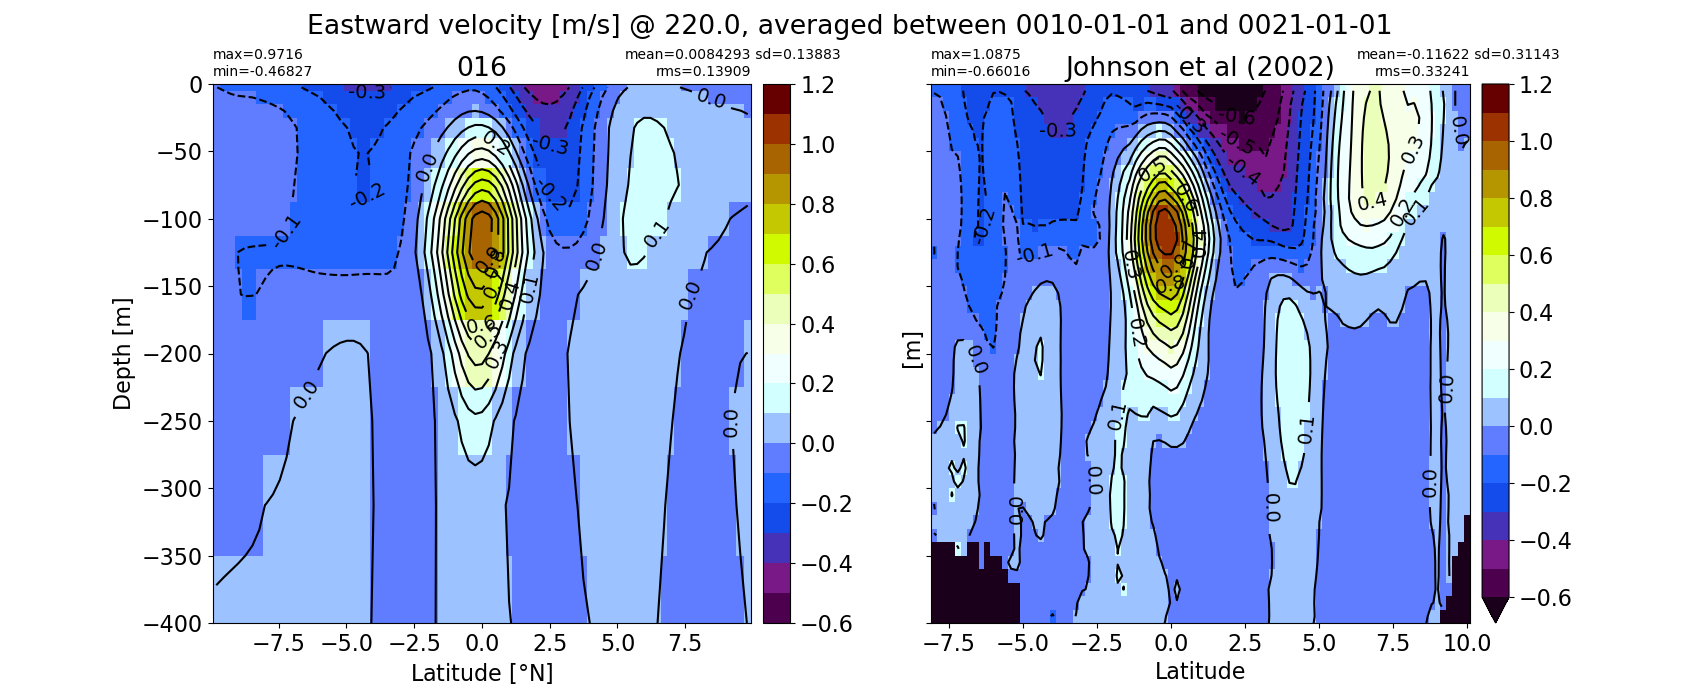

In [6]:
import glob
from IPython.display import Image, display

for i in range(len(casename)):
  #print(i)
  # List PNG files in the directory
  png_files = glob.glob(ocn_path[i]+'/../PNG/Equatorial/*.png')

  # Display PNG files in the Jupyter notebook
  for png_file in png_files:
    #print(png_file)
    display(Image(filename=png_file))